# **TOY DATASET- 30 USERS**



In [ ]:
import pandas as pd

# Define column names for each file
ratings_columns = ['userId', 'movieId', 'rating', 'timestamp']
item_columns = ['movieId', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
user_columns = ['userId', 'age', 'gender', 'occupation', 'zip_code']
occupation_columns = ['occupation']
genre_columns = ['genre', 'genre_id']

# Load each file with the specified path
ratings = pd.read_csv('/content/u.data', sep='\t', names=ratings_columns)
items = pd.read_csv('/content/u.item', sep='|', names=item_columns, encoding='latin-1')
users = pd.read_csv('/content/u.user', sep='|', names=user_columns)
occupations = pd.read_csv('/content/u.occupation', sep='|', names=occupation_columns)
genres = pd.read_csv('/content/u.genre', sep='|', names=genre_columns, header=None)


for i, genre_name in enumerate(genres['genre']):
    items[genre_name] = items[f'genre_{i}']

# Drop original genre_0, genre_1, etc., columns
genre_columns_to_drop = [f'genre_{i}' for i in range(19)]
items = items.drop(columns=genre_columns_to_drop)

# Filter ratings to include only the first 30 unique users
selected_users = ratings['userId'].unique()[:30]
ratings_filtered = ratings[ratings['userId'].isin(selected_users)]

# Merge filtered ratings with user information
merged_data = ratings_filtered.merge(users, on='userId', how='left')

# Merge the result with movie information, including genre labels
merged_data = merged_data.merge(items[['movieId', 'movie_title', 'release_date'] + list(genres['genre'])], on='movieId', how='left')

# Save as CSV
merged_data.to_csv('finallll.csv', index=False)



   userId  movieId  rating  timestamp  age gender  occupation zip_code  \
0       1        1       5  874965758   24      M  technician    85711   
1       2        1       4  888550871   53      F       other    94043   
2       5        1       4  875635748   33      F       other    15213   
3      10        1       4  877888877   53      M      lawyer    90703   
4      13        1       3  882140487   47      M    educator    29206   

              title release_date  ...  Fantasy Film-Noir  Horror  Musical  \
0  Toy Story (1995)  01-Jan-1995  ...        0         0       0        0   
1  Toy Story (1995)  01-Jan-1995  ...        0         0       0        0   
2  Toy Story (1995)  01-Jan-1995  ...        0         0       0        0   
3  Toy Story (1995)  01-Jan-1995  ...        0         0       0        0   
4  Toy Story (1995)  01-Jan-1995  ...        0         0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0 

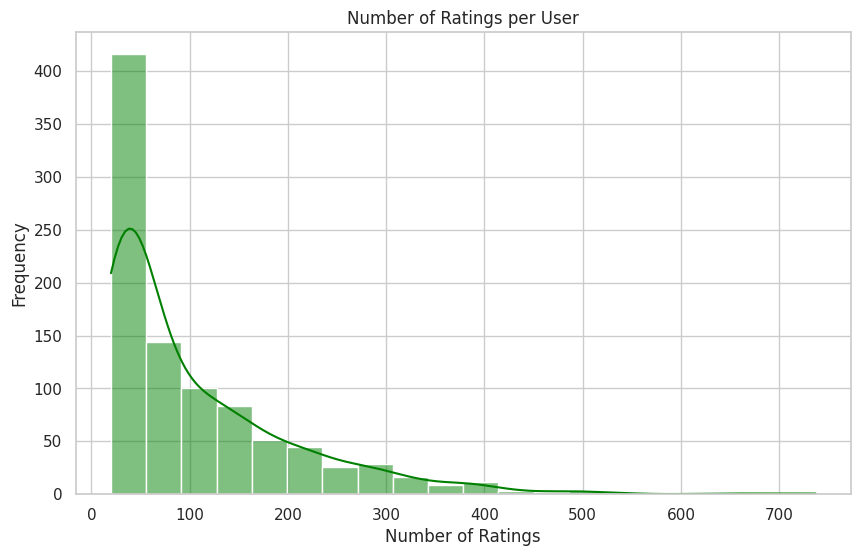

Mean number of ratings per user: 106.04453870625663
Max number of ratings by a user: 737
Min number of ratings by a user: 20


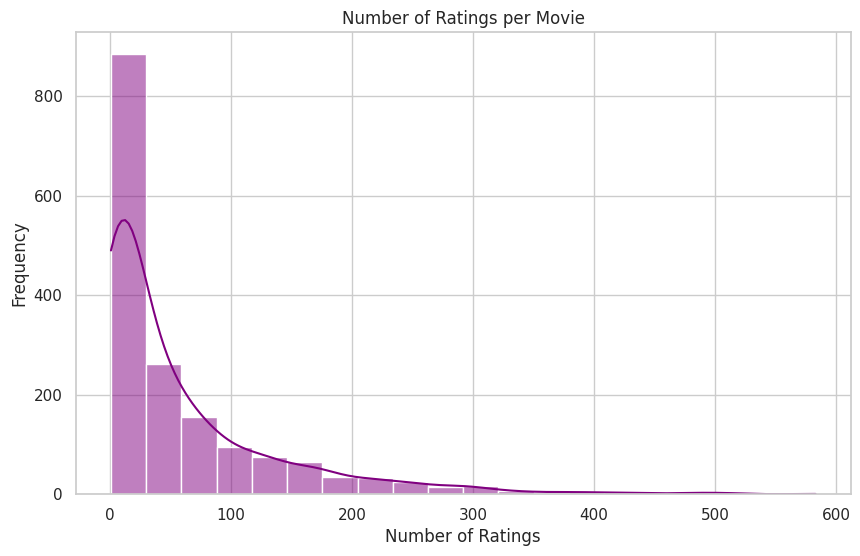

Mean number of ratings per movie: 59.45303210463734
Max number of ratings by a movie: 583
Min number of ratings by a movie: 1


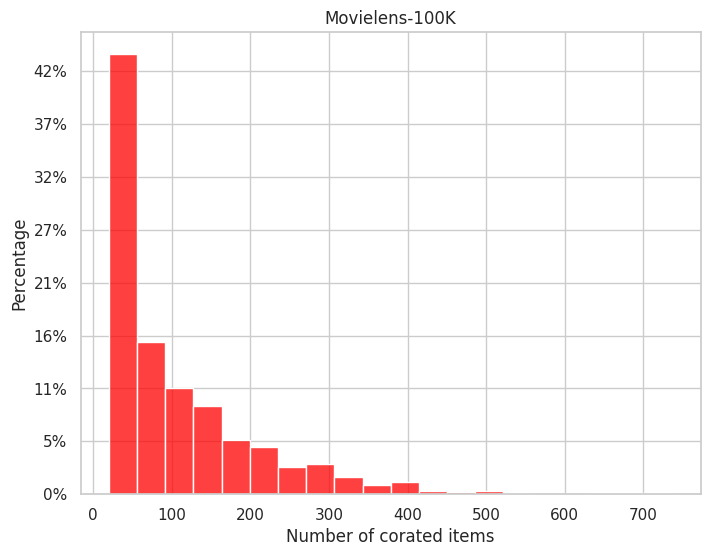

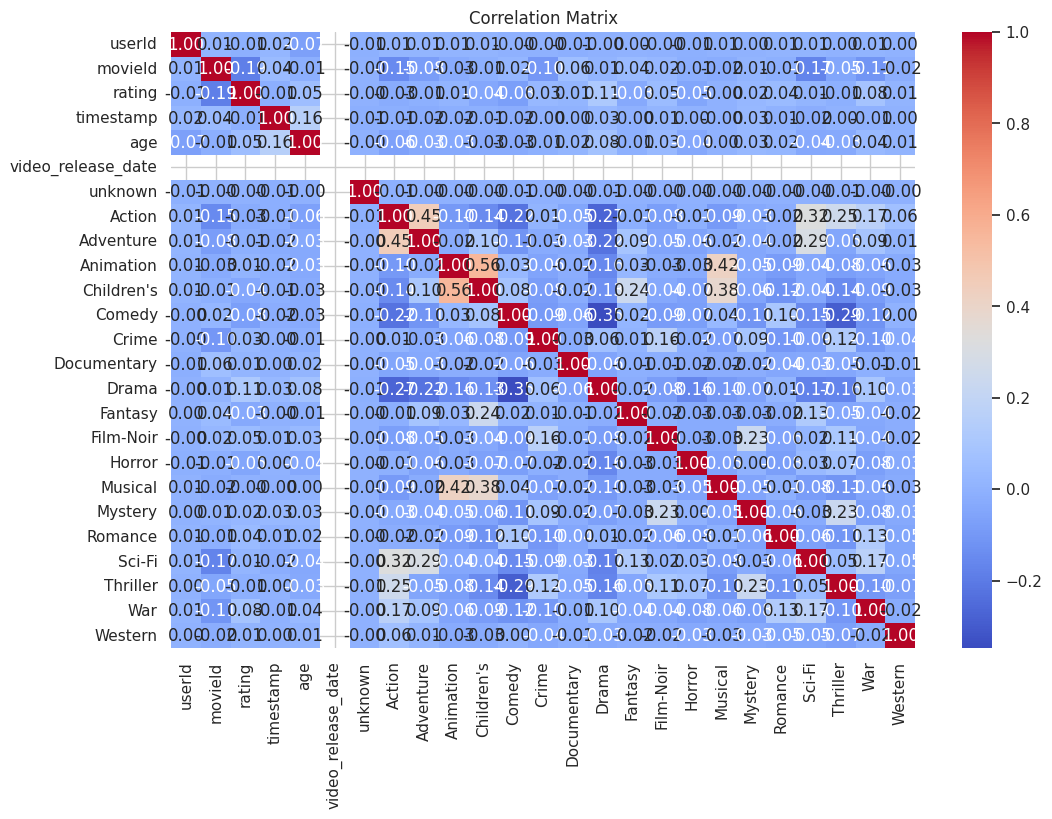

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_df = pd.read_csv('/content/train.csv')  # Adjust the file path as necessary

# Display the first few rows of the training data
print(training_df.head())

# Get a summary of the dataset
print(training_df.describe())

# Set the style of seaborn
sns.set(style='whitegrid')


# Count ratings per user
ratings_per_user = training_df['userId'].value_counts()

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=20, kde=True, color='green')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per user
print(f"Mean number of ratings per user: {ratings_per_user.mean()}")
print(f"Max number of ratings by a user: {ratings_per_user.max()}")
print(f"Min number of ratings by a user: {ratings_per_user.min()}")

# Count ratings per movie
ratings_per_movie = training_df['movieId'].value_counts()

# Plot the distribution of ratings per movie
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=20, kde=True, color='purple')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per movie
print(f"Mean number of ratings per movie: {ratings_per_movie.mean()}")
print(f"Max number of ratings by a movie: {ratings_per_movie.max()}")
print(f"Min number of ratings by a movie: {ratings_per_movie.min()}")

# Plot the number of co-rated items (adjusted to match your image)
co_rated_counts = training_df.groupby('userId').size()

plt.figure(figsize=(8, 6))
sns.histplot(co_rated_counts, bins=20, color='red', kde=False)
plt.title('Movielens-100K')
plt.xlabel('Number of corated items')
plt.ylabel('Percentage')

# Convert the y-axis to a percentage format
total_users = len(training_df['userId'].unique())
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_users) * 100:.0f}%'))

plt.show()

# Check for correlation in numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = training_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

   userId  movieId  rating  timestamp  age gender     occupation zip_code  \
0       1        6       5  887431973   24      M     technician    85711   
1       9        6       5  886960055   29      M        student    01002   
2      63        6       3  875747439   31      M      marketing    75240   
3      79        6       4  891271901   39      F  administrator    03755   
4      90        6       4  891384357   60      M       educator    78155   

                                               title release_date  ...  \
0  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995  ...   
1  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995  ...   
2  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995  ...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995  ...   
4  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995  ...   

   Fantasy Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0        0     

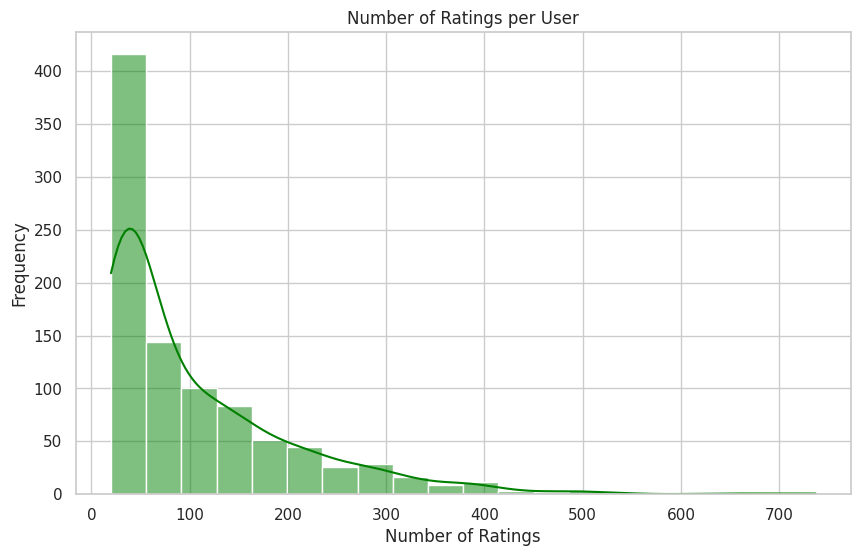

Mean number of ratings per user: 106.04453870625663
Max number of ratings by a user: 737
Min number of ratings by a user: 20


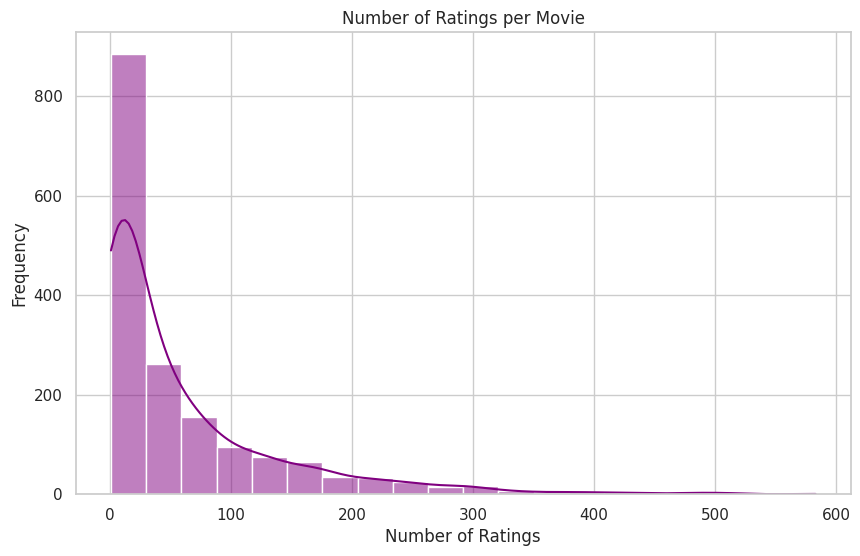

Mean number of ratings per movie: 59.45303210463734
Max number of ratings by a movie: 583
Min number of ratings by a movie: 1


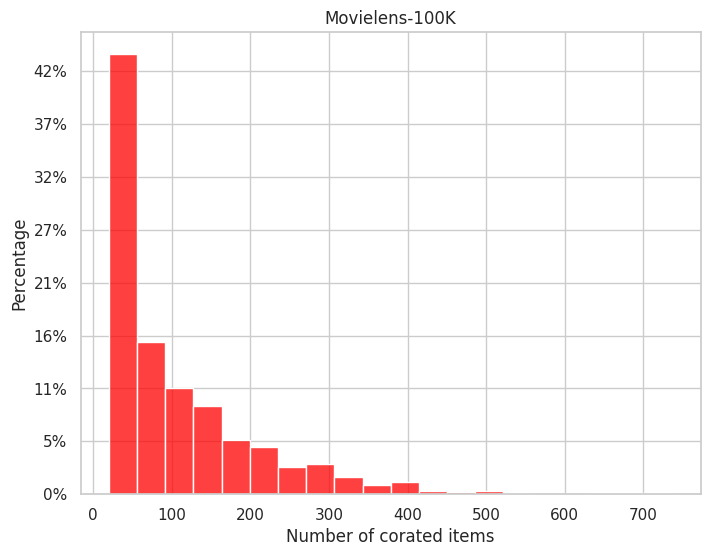

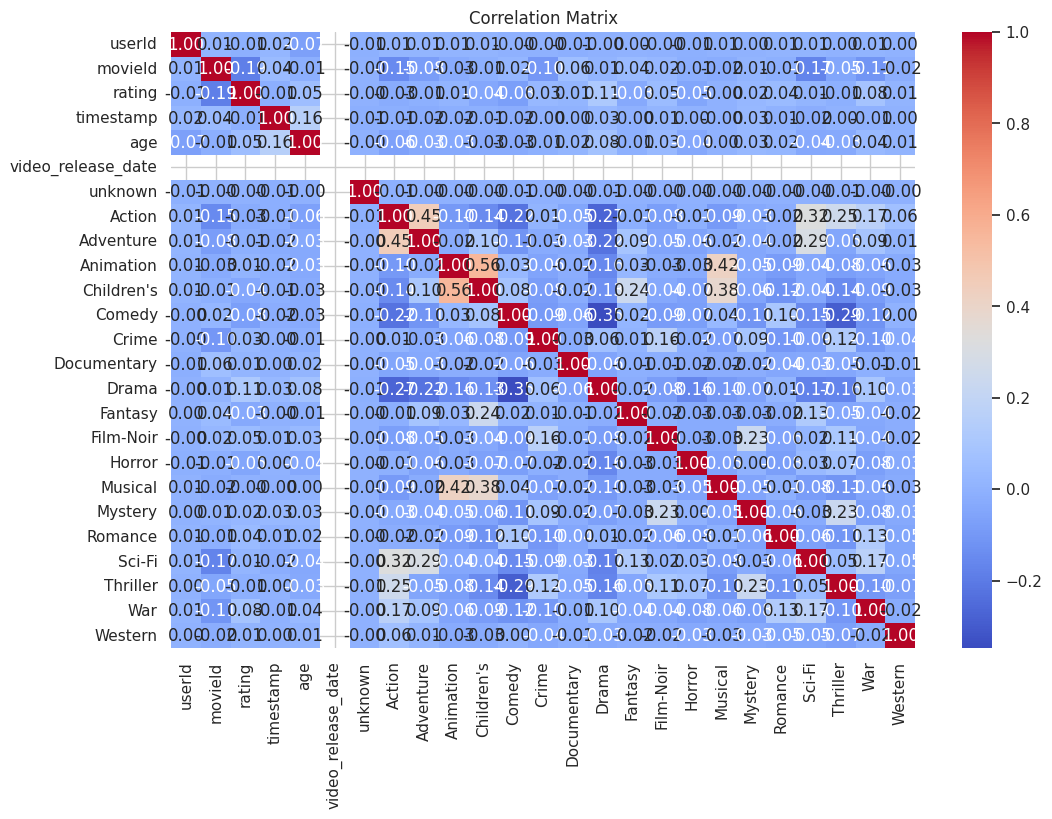

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_df = pd.read_csv('/content/test.csv')  # Adjust the file path as necessary

# Display the first few rows of the training data
print(training_df.head())

# Get a summary of the dataset
print(training_df.describe())

# Set the style of seaborn
sns.set(style='whitegrid')


# Count ratings per user
ratings_per_user = training_df['userId'].value_counts()

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=20, kde=True, color='green')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per user
print(f"Mean number of ratings per user: {ratings_per_user.mean()}")
print(f"Max number of ratings by a user: {ratings_per_user.max()}")
print(f"Min number of ratings by a user: {ratings_per_user.min()}")

# Count ratings per movie
ratings_per_movie = training_df['movieId'].value_counts()

# Plot the distribution of ratings per movie
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=20, kde=True, color='purple')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per movie
print(f"Mean number of ratings per movie: {ratings_per_movie.mean()}")
print(f"Max number of ratings by a movie: {ratings_per_movie.max()}")
print(f"Min number of ratings by a movie: {ratings_per_movie.min()}")

# Plot the number of co-rated items (adjusted to match your image)
co_rated_counts = training_df.groupby('userId').size()

plt.figure(figsize=(8, 6))
sns.histplot(co_rated_counts, bins=20, color='red', kde=False)
plt.title('Movielens-100K')
plt.xlabel('Number of corated items')
plt.ylabel('Percentage')

# Convert the y-axis to a percentage format
total_users = len(training_df['userId'].unique())
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_users) * 100:.0f}%'))

plt.show()

# Check for correlation in numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = training_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **DATA SPLITTING**

In [ ]:

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/finallll.csv')   # Replace with your actual file path

# Check the DataFrame structure and column names
print(df.info())
print(df.columns)

# Strip whitespace from column names if needed
df.columns = df.columns.str.strip()

# Randomly remove 80% of ratings
df = df.sample(frac=0.2, random_state=42)  # Keep 20% of the ratings

# Identify unique users
unique_users = df['userId'].unique()

# Select 20% of users as cold-start users
num_cold_start_users = int(0.2 * len(unique_users))
cold_start_users = random.sample(list(unique_users), num_cold_start_users)

# Prepare training and testing datasets
training_set = []
testing_set = []

for user in cold_start_users:
    user_ratings = df[df['userId'] == user]

    if len(user_ratings) > 5:
        # Select 5 ratings for training
        train_ratings = user_ratings.sample(n=5, random_state=42)

        # Get remaining ratings for testing
        remaining_ratings = user_ratings[~user_ratings.index.isin(train_ratings.index)]

        # Check if there are at least 20 ratings remaining for testing
        if len(remaining_ratings) >= 20:
            test_ratings = remaining_ratings.sample(n=20, random_state=42)
        else:
            test_ratings = remaining_ratings  # Use whatever is left if <20

        # Append to training and testing sets
        training_set.append(train_ratings)
        testing_set.append(test_ratings)
    elif len(user_ratings) <= 5:
        # Add all ratings to training set and exclude from testing
        training_set.append(user_ratings)

# Combine training and testing datasets
training_df = pd.concat(training_set).drop_duplicates()
testing_df = pd.concat(testing_set, ignore_index=True).drop_duplicates()

# Handle missing values (if any)
training_df = training_df.dropna()
testing_df = testing_df.dropna()

# Normalize ratings
scaler = MinMaxScaler()
training_df['rating'] = scaler.fit_transform(training_df[['rating']])
testing_df['rating'] = scaler.transform(testing_df[['rating']])

# Save the datasets
training_df.to_csv('preprocessed_training_set.csv', index=False)
testing_df.to_csv('preprocessed_testing_set.csv', index=False)

print("Training and testing sets have been created and saved successfully.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userId        5680 non-null   int64 
 1   movieId       5680 non-null   int64 
 2   rating        5680 non-null   int64 
 3   timestamp     5680 non-null   int64 
 4   age           5680 non-null   int64 
 5   gender        5680 non-null   object
 6   occupation    5680 non-null   object
 7   zip_code      5680 non-null   object
 8   movie_title   5680 non-null   object
 9   release_date  5680 non-null   object
 10  unknown       5680 non-null   int64 
 11  Action        5680 non-null   int64 
 12  Adventure     5680 non-null   int64 
 13  Animation     5680 non-null   int64 
 14  Children's    5680 non-null   int64 
 15  Comedy        5680 non-null   int64 
 16  Crime         5680 non-null   int64 
 17  Documentary   5680 non-null   int64 
 18  Drama         5680 non-null   int64 
 19  Fantas

## **OTHER MODELS**

<ipython-input-19-43c34025a45e>:26: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



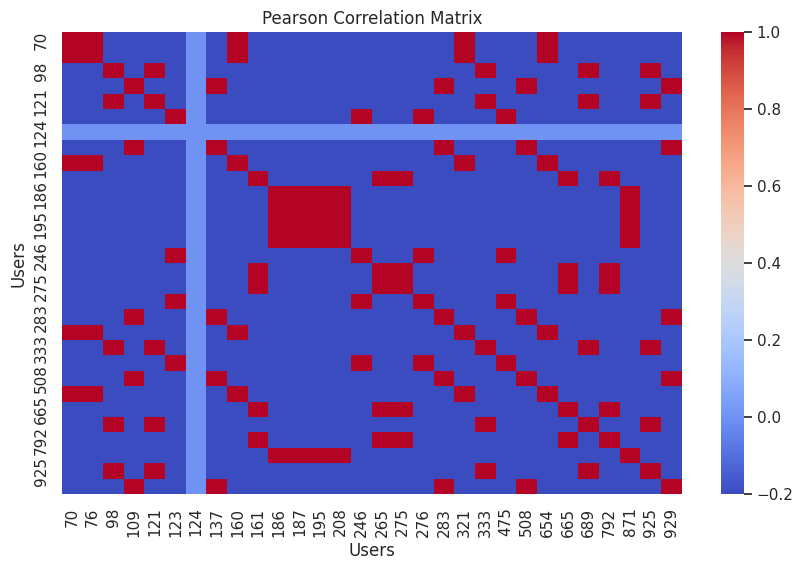

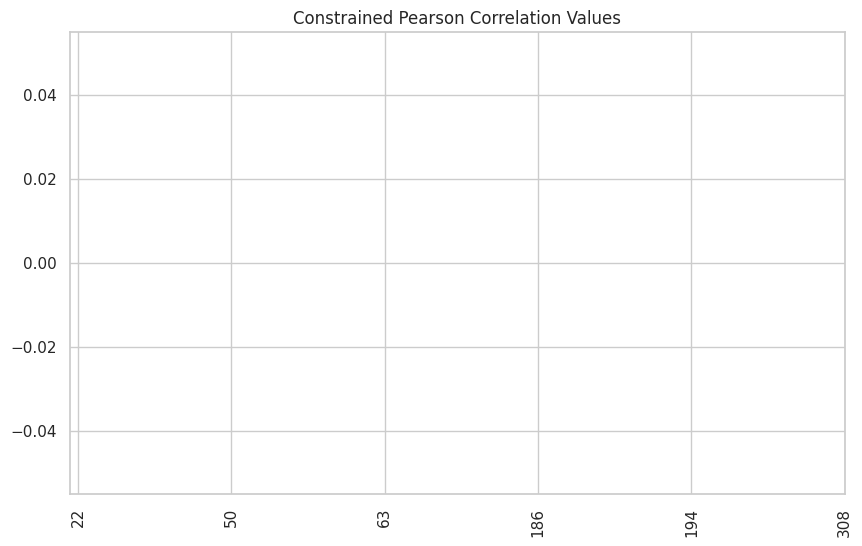

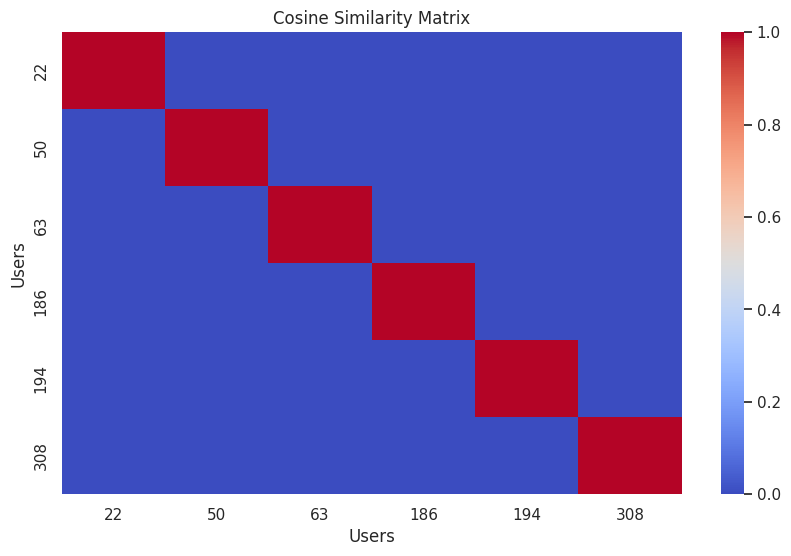

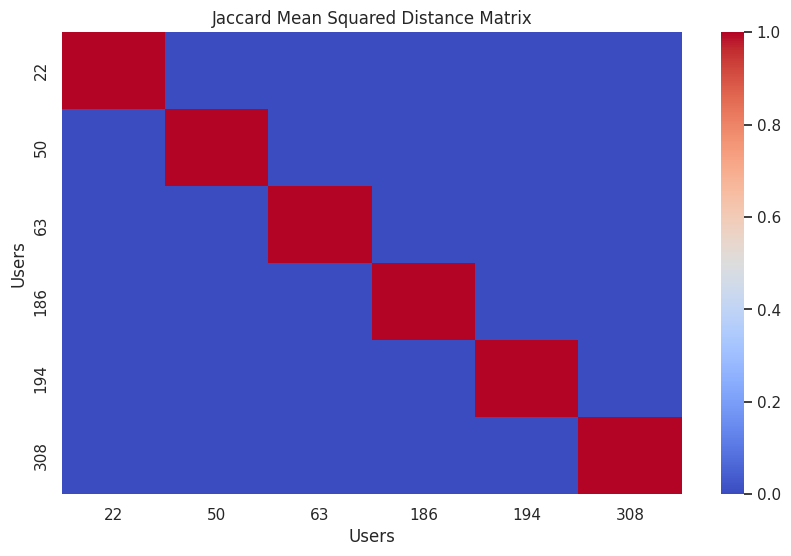

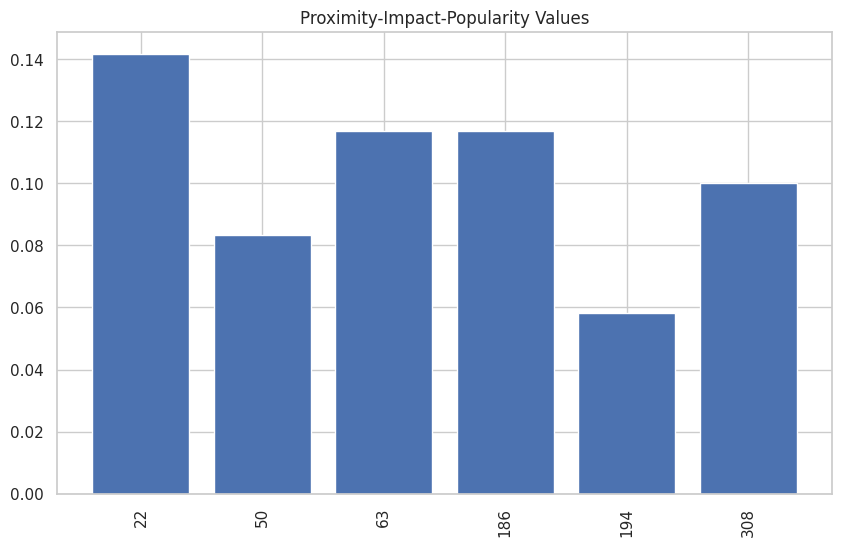

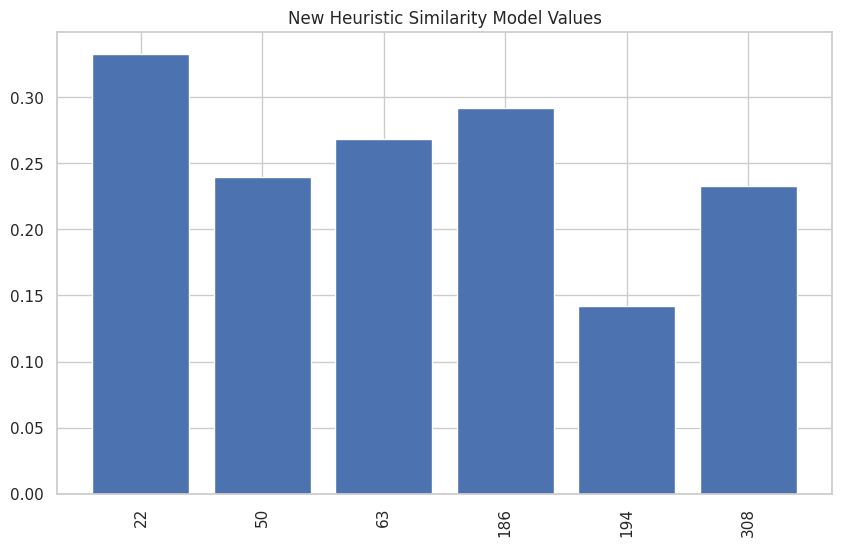

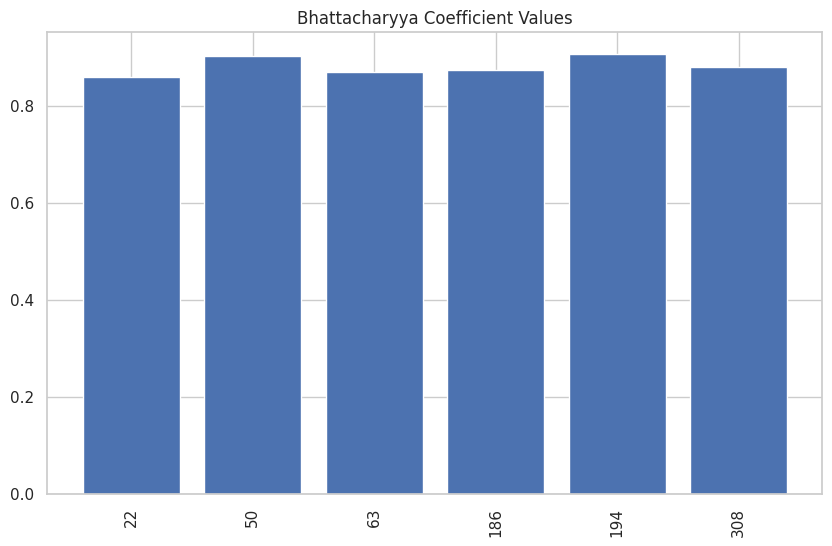

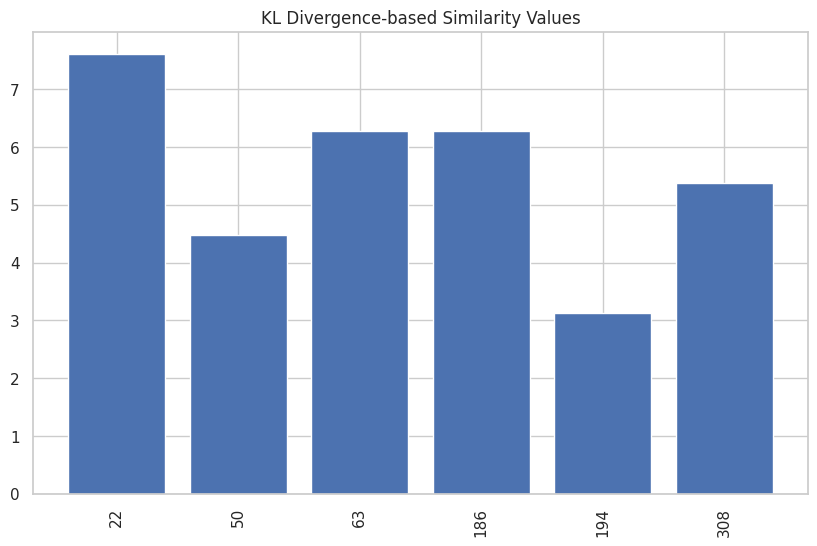

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine, jaccard
from scipy.stats import pearsonr

training_data = pd.read_csv('preprocessed_training_set.csv')
testing_data = pd.read_csv('preprocessed_testing_set.csv')

def create_ratings_matrix(data):
    return data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

def pearson_correlation(ratings_matrix):
    correlation_matrix = ratings_matrix.corr(method='pearson')
    correlation_matrix = correlation_matrix.fillna(0)
    return correlation_matrix

def constrained_pearson(ratings_matrix):
    median_ratings = ratings_matrix.median(axis=0)
    results = []
    for index, row in ratings_matrix.iterrows():
        if np.all(row == row.iloc[0]):  # Check if the row is constant
            results.append(0)
        else:
            results.append(pearsonr(row, median_ratings)[0])
    return pd.Series(results, index=ratings_matrix.index)

def cosine_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    sim_matrix = np.zeros((num_users, num_users))
    for i in range(num_users):
        for j in range(num_users):
            if i != j:
                if np.linalg.norm(ratings_matrix.iloc[i]) == 0 or np.linalg.norm(ratings_matrix.iloc[j]) == 0:
                    sim_matrix[i, j] = 0
                else:
                    sim_matrix[i, j] = 1 - cosine(ratings_matrix.iloc[i].values, ratings_matrix.iloc[j].values)
            else:
                sim_matrix[i, j] = 1
    return pd.DataFrame(sim_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

def jaccard_mean_squared_distance(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    sim_matrix = np.zeros((num_users, num_users))
    for i in range(num_users):
        for j in range(num_users):
            sim_matrix[i, j] = 1 - jaccard(ratings_matrix.iloc[i].values > 0, ratings_matrix.iloc[j].values > 0)
    return pd.DataFrame(sim_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

def proximity_impact_popularity(ratings_matrix):
    return ratings_matrix.mean(axis=1)

def new_heuristic_similarity(ratings_matrix):
    return ratings_matrix.std(axis=1)

def bhattacharyya_coefficient(ratings_matrix):
    return np.exp(-np.sum(np.sqrt(ratings_matrix), axis=1) / ratings_matrix.shape[1])

def kl_divergence_similarity(ratings_matrix):
    ratings_matrix = ratings_matrix.replace(0, 1e-9)
    mean_ratings = ratings_matrix.mean(axis=0)
    return np.sum(ratings_matrix * np.log(ratings_matrix / mean_ratings), axis=1)

ratings_matrix = create_ratings_matrix(training_data)

similarity_measures = {
    'Pearson Correlation': pearson_correlation(ratings_matrix),
    'Constrained Pearson Correlation': constrained_pearson(ratings_matrix),
    'Cosine Similarity': cosine_similarity(ratings_matrix),
    'Jaccard Mean Squared Distance': jaccard_mean_squared_distance(ratings_matrix),
    'Proximity-Impact-Popularity': proximity_impact_popularity(ratings_matrix),
    'New Heuristic Similarity Model': new_heuristic_similarity(ratings_matrix),
    'Bhattacharyya Coefficient': bhattacharyya_coefficient(ratings_matrix),
    'KL Divergence-based Similarity': kl_divergence_similarity(ratings_matrix)
}

for measure_name, measure_result in similarity_measures.items():
    plt.figure(figsize=(10, 6))
    if isinstance(measure_result, pd.DataFrame):
        sns.heatmap(measure_result, cmap='coolwarm', annot=False)
        plt.title(f'{measure_name} Matrix')
        plt.xlabel('Users')
        plt.ylabel('Users')
    else:
        plt.bar(range(len(measure_result)), measure_result)
        plt.title(f'{measure_name} Values')
        plt.xticks(range(len(measure_result)), ratings_matrix.index, rotation=90)
    plt.show()


## **DATA ANALYSIS**



   userId  movieId  rating  timestamp  age gender occupation zip_code  \
0     303      627    0.50  879484733   19      M    student    14853   
1     303      778    0.75  879467815   19      M    student    14853   
2     303       24    0.50  879468047   19      M    student    14853   
3     303      482    1.00  879467361   19      M    student    14853   
4     303      785    0.50  879485318   19      M    student    14853   

                            movie_title release_date  ...  Fantasy  Film-Noir  \
0  Robin Hood: Prince of Thieves (1991)  01-Jan-1991  ...        0          0   
1               Don Juan DeMarco (1995)  01-Jan-1995  ...        0          0   
2            Rumble in the Bronx (1995)  23-Feb-1996  ...        0          0   
3               Some Like It Hot (1959)  01-Jan-1959  ...        0          0   
4                       Only You (1994)  01-Jan-1994  ...        0          0   

   Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0  

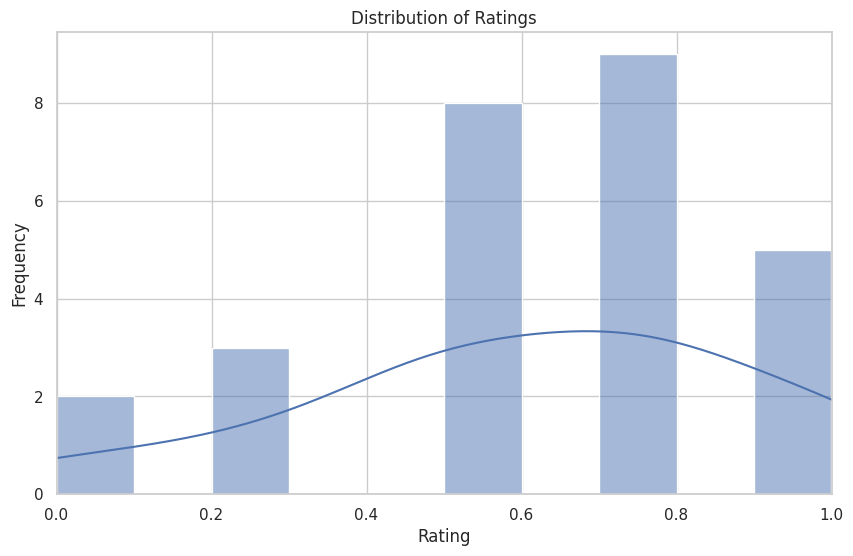

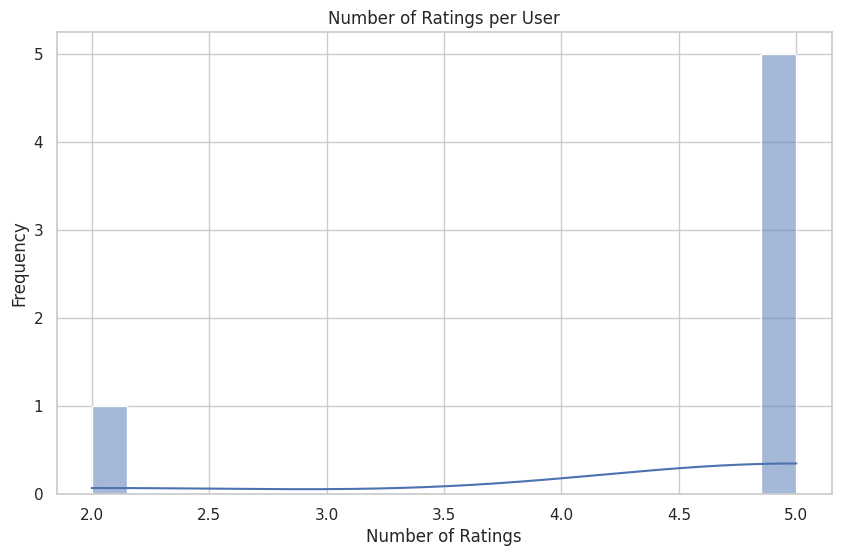

Mean number of ratings per user: 4.5
Max number of ratings by a user: 5
Min number of ratings by a user: 2


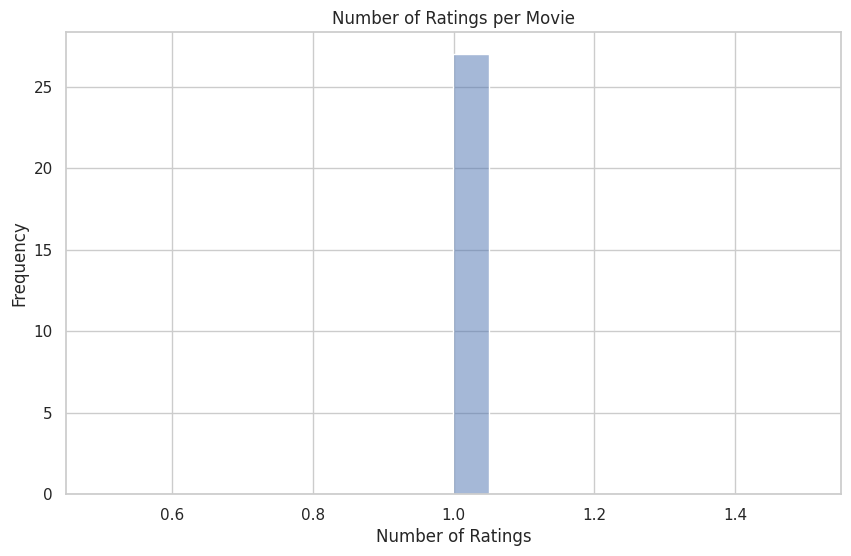

Mean number of ratings per movie: 1.0
Max number of ratings by a movie: 1
Min number of ratings by a movie: 1


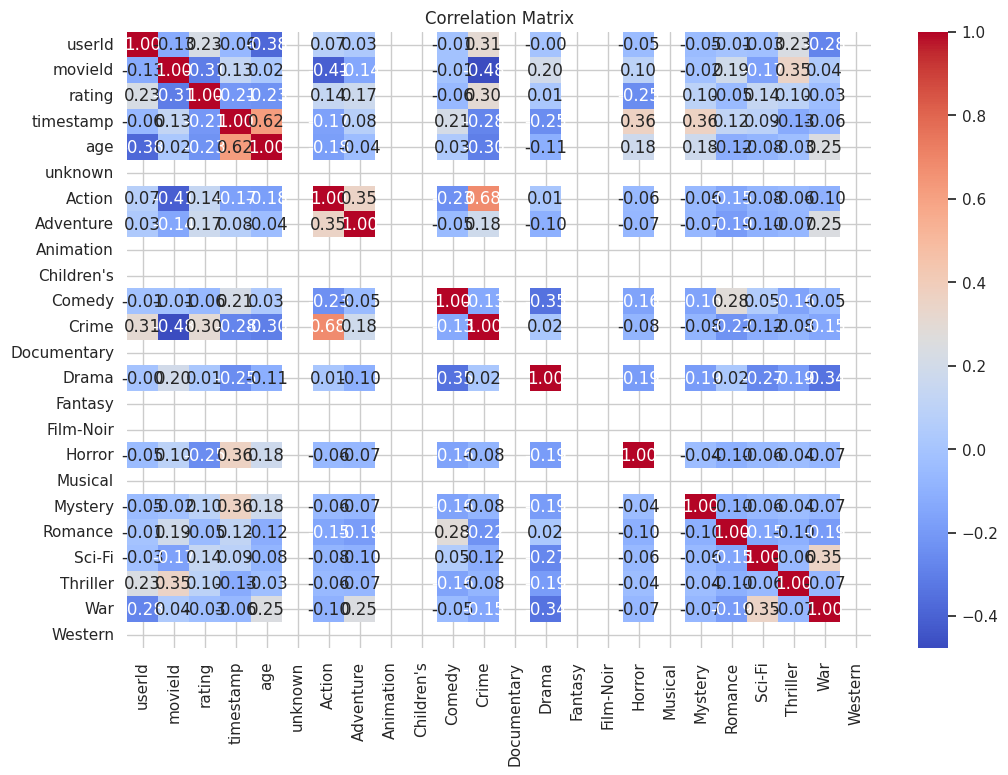

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_df = pd.read_csv('preprocessed_training_set.csv')  # Adjust the file path as necessary

# Display the first few rows of the training data
print(training_df.head())

# Get a summary of the dataset
print(training_df.describe())

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(training_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Since we normalized ratings between 0 and 1
plt.show()

# Count ratings per user
ratings_per_user = training_df['userId'].value_counts()

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=20, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per user
print(f"Mean number of ratings per user: {ratings_per_user.mean()}")
print(f"Max number of ratings by a user: {ratings_per_user.max()}")
print(f"Min number of ratings by a user: {ratings_per_user.min()}")

# Count ratings per movie
ratings_per_movie = training_df['movieId'].value_counts()

# Plot the distribution of ratings per movie
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=20, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per movie
print(f"Mean number of ratings per movie: {ratings_per_movie.mean()}")
print(f"Max number of ratings by a movie: {ratings_per_movie.max()}")
print(f"Min number of ratings by a movie: {ratings_per_movie.min()}")

# Check for correlation in numeric features
plt.figure(figsize=(12, 8))
# Select only numeric columns for the correlation matrix
correlation_matrix = training_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


   userId  movieId  rating  timestamp  age gender occupation zip_code  \
0     303      405    0.75  879483802   19      M    student    14853   
1     303      185    1.00  879467465   19      M    student    14853   
2     303      867    0.50  879484373   19      M    student    14853   
3     303      653    0.75  879466937   19      M    student    14853   
4     303      840    0.25  879543988   19      M    student    14853   

                    movie_title release_date  ...  Fantasy  Film-Noir  Horror  \
0    Mission: Impossible (1996)  22-May-1996  ...        0          0       0   
1                 Psycho (1960)  01-Jan-1960  ...        0          0       1   
2  Whole Wide World, The (1996)  25-Dec-1996  ...        0          0       0   
3          Touch of Evil (1958)  01-Jan-1958  ...        0          1       0   
4      Last Man Standing (1996)  20-Sep-1996  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0 

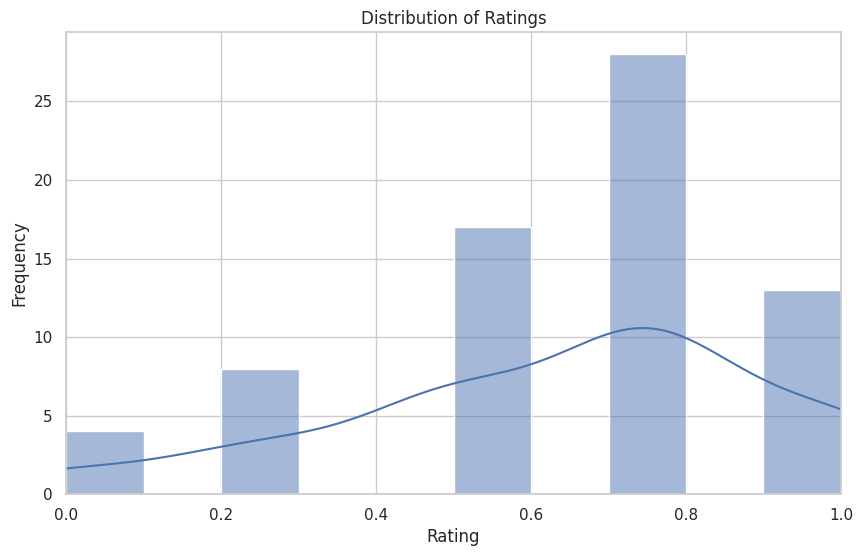

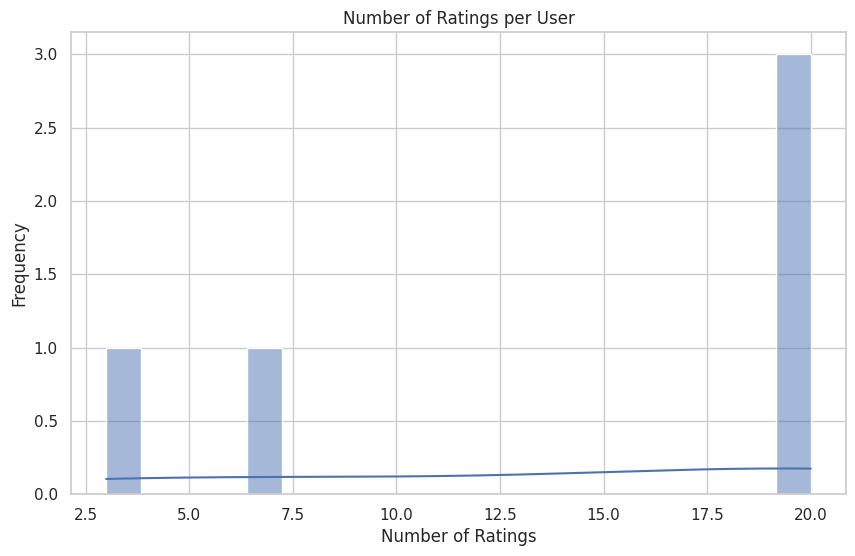

Mean number of ratings per user: 14.0
Max number of ratings by a user: 20
Min number of ratings by a user: 3


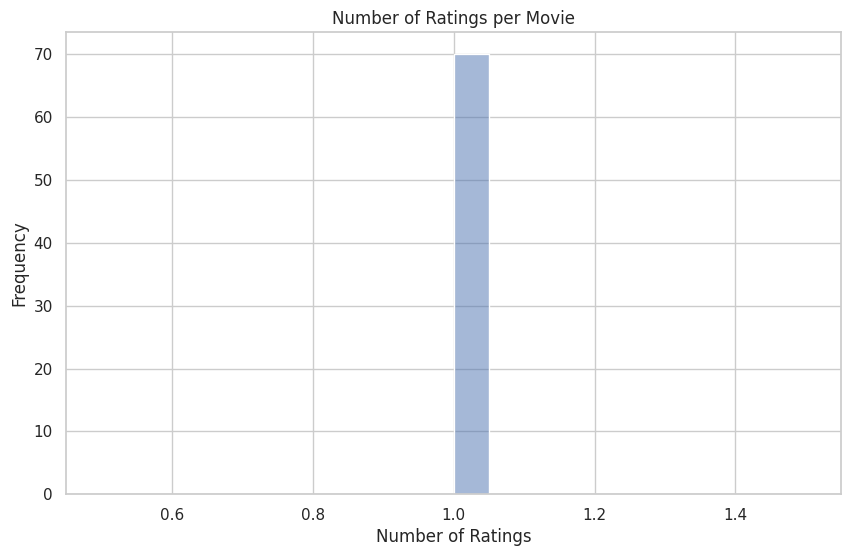

Mean number of ratings per movie: 1.0
Max number of ratings by a movie: 1
Min number of ratings by a movie: 1


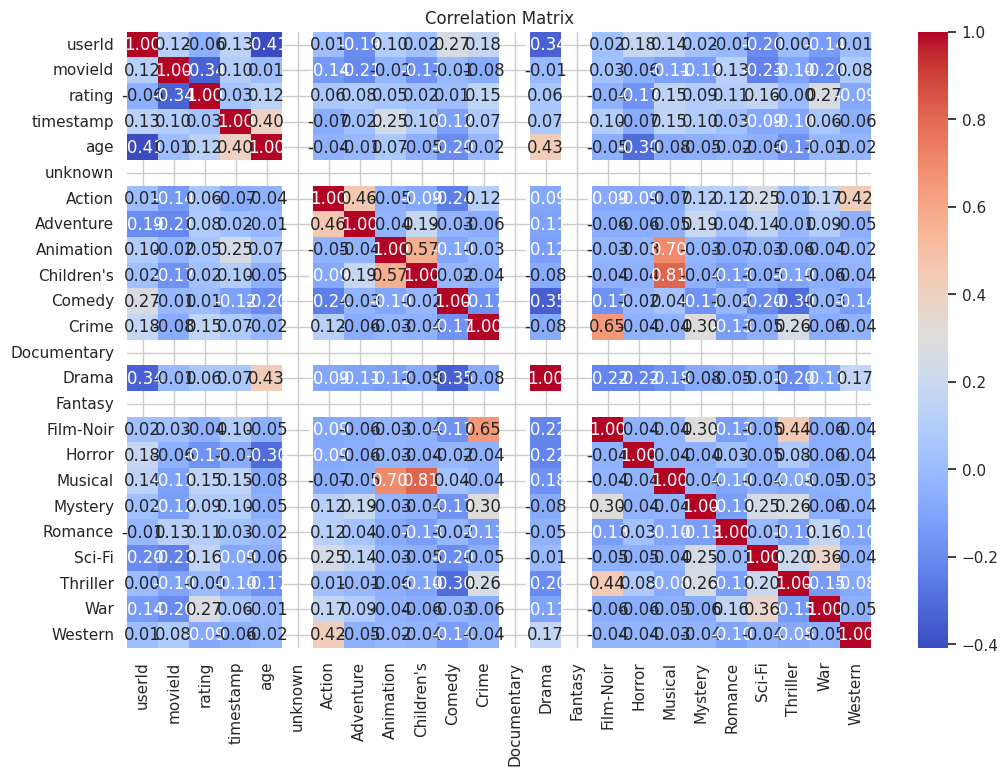

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_df = pd.read_csv('/content/preprocessed_testing_set.csv')  # Adjust the file path as necessary

# Display the first few rows of the training data
print(training_df.head())

# Get a summary of the dataset
print(training_df.describe())

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(training_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Since we normalized ratings between 0 and 1
plt.show()

# Count ratings per user
ratings_per_user = training_df['userId'].value_counts()

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=20, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per user
print(f"Mean number of ratings per user: {ratings_per_user.mean()}")
print(f"Max number of ratings by a user: {ratings_per_user.max()}")
print(f"Min number of ratings by a user: {ratings_per_user.min()}")

# Count ratings per movie
ratings_per_movie = training_df['movieId'].value_counts()

# Plot the distribution of ratings per movie
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=20, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about ratings per movie
print(f"Mean number of ratings per movie: {ratings_per_movie.mean()}")
print(f"Max number of ratings by a movie: {ratings_per_movie.max()}")
print(f"Min number of ratings by a movie: {ratings_per_movie.min()}")

# Check for correlation in numeric features
plt.figure(figsize=(12, 8))
# Select only numeric columns for the correlation matrix
correlation_matrix = training_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


DATA SPLITTING

In [ ]:

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('C:/Users/USER/Desktop/Project papers sowmini/ml-100k/finallll.csv')   # Replace with your actual file path

# Check the DataFrame structure and column names
print(df.info())
print(df.columns)

# Strip whitespace from column names if needed
df.columns = df.columns.str.strip()

# Randomly remove 80% of ratings
df = df.sample(frac=0.2, random_state=42)  # Keep 20% of the ratings

# Identify unique users
unique_users = df['userId'].unique()

# Select 20% of users as cold-start users
num_cold_start_users = int(0.2 * len(unique_users))
cold_start_users = random.sample(list(unique_users), num_cold_start_users)

# Prepare training and testing datasets
training_set = []
testing_set = []

for user in cold_start_users:
    user_ratings = df[df['userId'] == user]

    if len(user_ratings) > 5:
        # Select 5 ratings for training
        train_ratings = user_ratings.sample(n=5, random_state=42)

        # Get remaining ratings for testing
        remaining_ratings = user_ratings[~user_ratings.index.isin(train_ratings.index)]

        # Check if there are at least 20 ratings remaining for testing
        if len(remaining_ratings) >= 20:
            test_ratings = remaining_ratings.sample(n=20, random_state=42)
        else:
            test_ratings = remaining_ratings  # Use whatever is left if <20

        # Append to training and testing sets
        training_set.append(train_ratings)
        testing_set.append(test_ratings)
    elif len(user_ratings) <= 5:
        # Add all ratings to training set and exclude from testing
        training_set.append(user_ratings)

# Combine training and testing datasets
training_df = pd.concat(training_set).drop_duplicates()
testing_df = pd.concat(testing_set, ignore_index=True).drop_duplicates()

# Handle missing values (if any)
training_df = training_df.dropna()
testing_df = testing_df.dropna()

# Normalize ratings
scaler = MinMaxScaler()
training_df['rating'] = scaler.fit_transform(training_df[['rating']])
testing_df['rating'] = scaler.transform(testing_df[['rating']])

# Save the datasets
training_df.to_csv('preprocessed_training_set.csv', index=False)
testing_df.to_csv('preprocessed_testing_set.csv', index=False)

print("Training and testing sets have been created and saved successfully.")


# **WCF**

userId         1         2         3         4         5
userId                                                  
1       0.000000  0.124234  0.083917  0.090053  0.174947
2       0.124234  0.000000  0.177497  0.182536  0.211573
3       0.083917  0.177497  0.000000  0.191130  0.141179
4       0.090053  0.182536  0.191130  0.000000  0.193046
5       0.174947  0.211573  0.141179  0.193046  0.000000


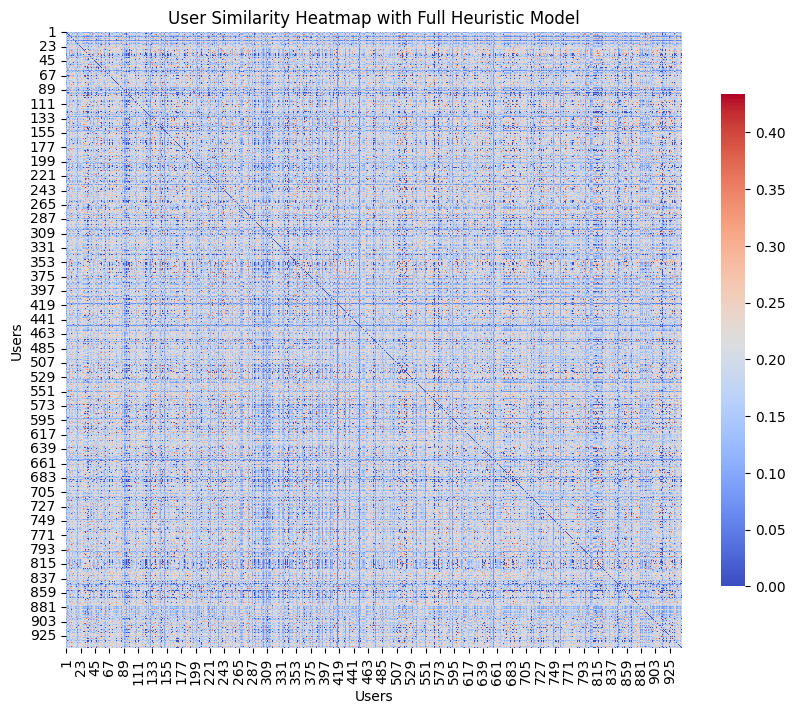

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (please update the path as needed)
training_data = pd.read_csv('/content/train.csv')

# Create user-item ratings matrix
def create_ratings_matrix(data):
    return data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Generate the ratings matrix
ratings_matrix = create_ratings_matrix(training_data)

# Calculate Antipopularity and Antiprominent using logistic functions
def compute_antipopularity_and_antiprominent(data):
    item_popularity = data['movieId'].value_counts()
    user_activity = data['userId'].value_counts()

    # Antipopularity (using logistic transformation for each item)
    max_item_popularity = item_popularity.max()
    antipopularity = {
        item: 2 - (1 / (1 + np.exp(-pop / max_item_popularity)))
        for item, pop in item_popularity.items()
    }

    # Antiprominent (using logistic transformation for each user)
    max_user_activity = user_activity.max()
    antiprominent = {
        user: 2 - (1 / (1 + np.exp(-act / max_user_activity)))
        for user, act in user_activity.items()
    }

    return antipopularity, antiprominent

# Fetch heuristic factors
antipopularity, antiprominent = compute_antipopularity_and_antiprominent(training_data)

# Define Proximity, Significance, and Singularity functions
def compute_proximity(r_ui, r_uj):
    return 1 - abs(r_ui - r_uj) / 5  # Assuming ratings are on a scale of 1 to 5

def compute_significance(r_ui, r_uj):
    return min(r_ui, r_uj) / max(r_ui, r_uj) if max(r_ui, r_uj) != 0 else 0

def compute_singularity(r_ui, r_uj):
    return 1 - abs(r_ui - r_uj) / (1 + abs(r_ui - r_uj))

# Calculate SPS2A2 factor for each item pair (i, j)
def compute_sps2a2(u, v, item, antipopularity, antiprominent):
    r_ui = ratings_matrix.loc[u, item]
    r_vj = ratings_matrix.loc[v, item]

    # Calculate each of the heuristic factors
    proximity = compute_proximity(r_ui, r_vj)
    significance = compute_significance(r_ui, r_vj)
    singularity = compute_singularity(r_ui, r_vj)
    anti_pop = antipopularity.get(item, 1)
    anti_prom = antiprominent.get(v, 1)

    # Multiply all heuristic factors
    return proximity * significance * singularity * anti_pop * anti_prom

# Calculate Local Similarity between two users u and v
def calculate_local_similarity(u, v, antipopularity, antiprominent):
    common_items = ratings_matrix.loc[u][ratings_matrix.loc[u] > 0].index.intersection(
        ratings_matrix.loc[v][ratings_matrix.loc[v] > 0].index
    )

    if len(common_items) == 0:
        return 0  # No common items, similarity is zero

    # Multiplicative factor as per formula
    local_similarity = 1
    for item in common_items:
        sps2a2_value = compute_sps2a2(u, v, item, antipopularity, antiprominent)
        local_similarity *= (1 + sps2a2_value)

    # Final normalization
    return local_similarity ** (1 / len(common_items))

# Compute Adjusted URP Similarity (S_A-URP)
def compute_urp_similarity(u, v):
    mu_u, mu_v = ratings_matrix.loc[u].mean(), ratings_matrix.loc[v].mean()
    sigma_u, sigma_v = ratings_matrix.loc[u].std(), ratings_matrix.loc[v].std()

    term1 = 1 - (1 / (1 + np.exp(-abs(mu_u - mu_v))))
    term2 = 1 - (1 / (1 + np.exp(-abs(sigma_u - sigma_v))))

    return term1 * term2

# Compute Asymmetric Jaccard Similarity (S_A-Jaccard)
def compute_asymmetric_jaccard(u, v):
    common_items = ratings_matrix.loc[u][ratings_matrix.loc[u] > 0].index.intersection(
        ratings_matrix.loc[v][ratings_matrix.loc[v] > 0].index
    )
    u_items = ratings_matrix.loc[u][ratings_matrix.loc[u] > 0].index
    return 1 / (1 + np.exp(-len(common_items) / len(u_items)))

# Calculate Global Similarity
def calculate_global_similarity(u, v):
    urp_similarity = compute_urp_similarity(u, v)
    jaccard_similarity = compute_asymmetric_jaccard(u, v)
    return urp_similarity * jaccard_similarity

# Calculate the full similarity between two users u and v
def calculate_full_similarity(u, v, antipopularity, antiprominent):
    local_similarity = calculate_local_similarity(u, v, antipopularity, antiprominent)
    global_similarity = calculate_global_similarity(u, v)
    return local_similarity * global_similarity

# Generate pairwise similarity matrix
num_users = ratings_matrix.shape[0]
user_ids = ratings_matrix.index
similarity_matrix = np.zeros((num_users, num_users))

for i in range(num_users):
    for j in range(i + 1, num_users):
        user_u = user_ids[i]
        user_v = user_ids[j]
        similarity = calculate_full_similarity(user_u, user_v, antipopularity, antiprominent)
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# Convert similarity matrix to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=user_ids, columns=user_ids)

# Display the first few rows and columns of the similarity matrix
print(similarity_df.iloc[:5, :5])

# Plot the heatmap of similarities
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("User Similarity Heatmap with Full Heuristic Model")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()


HYPER PARAMETER TUNING

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import multiprocessing as mp
import random
from scipy.stats import wasserstein_distance
import time

# Load datasets (please update the path as needed)
training_data = pd.read_csv('/content/train.csv')  # Update the path to your dataset

# Create user-item ratings matrix
ratings_matrix = training_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_ids = ratings_matrix.index

# Sample 100 users for the subset
k_users = 100
sampled_user_ids = random.sample(list(user_ids), k_users)

# Create a subset ratings matrix for these 100 users only
ratings_matrix_subset = ratings_matrix.loc[sampled_user_ids]

# Define a function to compute antipopularity and antiprominent with a scaling factor
def compute_antipopularity_and_antiprominent(data, scaling_factor=1.0):
    item_popularity = data['movieId'].value_counts()
    user_activity = data['userId'].value_counts()
    max_item_popularity = item_popularity.max()
    max_user_activity = user_activity.max()

    # Adjust the logistic scaling factor
    antipopularity = {
        item: 2 - (1 / (1 + np.exp(-pop / (max_item_popularity * scaling_factor))))
        for item, pop in item_popularity.items()
    }
    antiprominent = {
        user: 2 - (1 / (1 + np.exp(-act / (max_user_activity * scaling_factor))))
        for user, act in user_activity.items()
    }

    return antipopularity, antiprominent

# Define heuristic functions
def compute_proximity(r_ui, r_uj):
    return 1 - abs(r_ui - r_uj) / 5

def compute_significance(r_ui, r_uj):
    return min(r_ui, r_uj) / max(r_ui, r_uj) if max(r_ui, r_uj) != 0 else 0

def compute_singularity(r_ui, r_uj):
    return 1 - abs(r_ui - r_uj) / (1 + abs(r_ui - r_uj))

# Function to compute SPS2A2 with optional factor exclusion
def compute_sps2a2(u, v, item, antipopularity, antiprominent, exclude_factor=None):
    r_ui = ratings_matrix_subset.loc[u, item]
    r_vj = ratings_matrix_subset.loc[v, item]
    factors = []

    if exclude_factor != "proximity":
        factors.append(compute_proximity(r_ui, r_vj))
    if exclude_factor != "significance":
        factors.append(compute_significance(r_ui, r_vj))
    if exclude_factor != "singularity":
        factors.append(compute_singularity(r_ui, r_vj))

    factors.append(antipopularity.get(item, 1))
    factors.append(antiprominent.get(v, 1))

    return np.prod(factors)

# Update local similarity function to include wasserstein_distance
def calculate_local_similarity(u, v, antipopularity, antiprominent, exclude_factor=None):
    common_items = ratings_matrix_subset.loc[u][ratings_matrix_subset.loc[u] > 0].index.intersection(
        ratings_matrix_subset.loc[v][ratings_matrix_subset.loc[v] > 0].index
    )

    if len(common_items) == 0:
        return 0  # No common items, so similarity is zero

    # Use Wasserstein distance on the common items’ ratings
    ratings_u = ratings_matrix_subset.loc[u, common_items].values
    ratings_v = ratings_matrix_subset.loc[v, common_items].values
    wasserstein_sim = 1 / (1 + wasserstein_distance(ratings_u, ratings_v))

    # Multiply Wasserstein distance with other heuristic-based factors
    local_similarity = wasserstein_sim
    for item in common_items:
        sps2a2_value = compute_sps2a2(u, v, item, antipopularity, antiprominent, exclude_factor)
        local_similarity *= (1 + sps2a2_value)

    return local_similarity ** (1 / len(common_items))

# Global Similarity (unchanged)
def compute_urp_similarity(u, v):
    mu_u, mu_v = ratings_matrix_subset.loc[u].mean(), ratings_matrix_subset.loc[v].mean()
    sigma_u, sigma_v = ratings_matrix_subset.loc[u].std(), ratings_matrix_subset.loc[v].std()
    term1 = 1 - (1 / (1 + np.exp(-abs(mu_u - mu_v))))
    term2 = 1 - (1 / (1 + np.exp(-abs(sigma_u - sigma_v))))
    return term1 * term2

def compute_asymmetric_jaccard(u, v):
    common_items = ratings_matrix_subset.loc[u][ratings_matrix_subset.loc[u] > 0].index.intersection(
        ratings_matrix_subset.loc[v][ratings_matrix_subset.loc[v] > 0].index
    )
    u_items = ratings_matrix_subset.loc[u][ratings_matrix_subset.loc[u] > 0].index
    return 1 / (1 + np.exp(-len(common_items) / len(u_items))) if len(u_items) > 0 else 0

def calculate_global_similarity(u, v):
    urp_similarity = compute_urp_similarity(u, v)
    jaccard_similarity = compute_asymmetric_jaccard(u, v)
    return urp_similarity * jaccard_similarity

# Function to calculate full similarity
def calculate_full_similarity(u, v, antipopularity, antiprominent, local_weight, global_weight, exclude_factor=None):
    local_similarity = calculate_local_similarity(u, v, antipopularity, antiprominent, exclude_factor) ** local_weight
    global_similarity = calculate_global_similarity(u, v) ** global_weight
    return local_similarity * global_similarity

# Parallelized similarity calculation for each user pair
def parallel_similarity_calc(user_pair, antipopularity, antiprominent, local_weight, global_weight, exclude_factor):
    u, v = user_pair
    return calculate_full_similarity(u, v, antipopularity, antiprominent, local_weight, global_weight, exclude_factor)

# Hyperparameter tuning grid
scaling_factors = [0.5, 1.0, 1.5]
local_weights = [0.5, 0.7, 1.0]
global_weights = [0.5, 0.7, 1.0]
exclude_factors = [None, "proximity", "significance", "singularity"]

# Calculate total epochs for tracking
total_epochs = len(scaling_factors) * len(local_weights) * len(global_weights) * len(exclude_factors)
print(f"Total epochs to run: {total_epochs}")

# Results storage
best_params = None
best_score = -np.inf

# Perform grid search over the hyperparameters
for epoch, (scaling_factor, local_weight, global_weight, exclude_factor) in enumerate(product(scaling_factors, local_weights, global_weights, exclude_factors), start=1):
    # Track time and print progress for each combination
    start_time = time.time()
    print(f"\nEpoch {epoch}/{total_epochs}: Testing Scaling factor={scaling_factor}, Local weight={local_weight}, Global weight={global_weight}, Exclude factor={exclude_factor}")

    # Compute antipopularity and antiprominent with the current scaling factor
    antipopularity, antiprominent = compute_antipopularity_and_antiprominent(training_data, scaling_factor)

    # Initialize similarity dictionary for storing top 100 neighbors
    similarity_dict = {user: [] for user in sampled_user_ids}

    # Define user pairs for parallel processing (using sampled 100 users)
    user_pairs = [(sampled_user_ids[i], sampled_user_ids[j]) for i in range(len(sampled_user_ids)) for j in range(i + 1, len(sampled_user_ids))]

    # Use multiprocessing pool to calculate similarities in parallel
    with mp.Pool() as pool:
        similarities = pool.starmap(
            parallel_similarity_calc,
            [(pair, antipopularity, antiprominent, local_weight, global_weight, exclude_factor) for pair in user_pairs]
        )

    # Accumulate similarities into the dictionary and retain only the top 100 for each user
    for (u, v), sim in zip(user_pairs, similarities):
        similarity_dict[u].append((v, sim))
        similarity_dict[v].append((u, sim))

    # Retain only the top 100 neighbors for each user
    for user in similarity_dict:
        similarity_dict[user] = sorted(similarity_dict[user], key=lambda x: x[1], reverse=True)[:100]

    # Calculate average similarity for this parameter combination
    avg_similarity = np.mean([sim for sims in similarity_dict.values() for _, sim in sims])
    print(f"Average Similarity for Epoch {epoch}: {avg_similarity}")

    # Check time taken for this epoch
    epoch_time = time.time() - start_time
    print(f"Time taken for Epoch {epoch}: {epoch_time:.2f} seconds")

    # Update best parameters if current score is better
    if avg_similarity > best_score:
        best_score = avg_similarity
        best_params = {
            "scaling_factor": scaling_factor,
            "local_weight": local_weight,
            "global_weight": global_weight,
            "exclude_factor": exclude_factor
        }

# Display the best hyperparameters
print("\nBest Hyperparameters:")
print(best_params)
print("Best Average Similarity Score:", best_score)


Total epochs to run: 108

Epoch 1/108: Testing Scaling factor=0.5, Local weight=0.5, Global weight=0.5, Exclude factor=None
Average Similarity for Epoch 1: 0.3773785693720612
Time taken for Epoch 1: 12.55 seconds

Epoch 2/108: Testing Scaling factor=0.5, Local weight=0.5, Global weight=0.5, Exclude factor=proximity
Average Similarity for Epoch 2: 0.38903875486934286
Time taken for Epoch 2: 12.98 seconds

Epoch 3/108: Testing Scaling factor=0.5, Local weight=0.5, Global weight=0.5, Exclude factor=significance
Average Similarity for Epoch 3: 0.3928654629224431
Time taken for Epoch 3: 13.00 seconds

Epoch 4/108: Testing Scaling factor=0.5, Local weight=0.5, Global weight=0.5, Exclude factor=singularity
Average Similarity for Epoch 4: 0.41532699080343943
Time taken for Epoch 4: 12.94 seconds

Epoch 5/108: Testing Scaling factor=0.5, Local weight=0.5, Global weight=0.7, Exclude factor=None
Average Similarity for Epoch 5: 0.23894293567190128
Time taken for Epoch 5: 13.16 seconds

Epoch 6/108

## ***ALL MODELS- U2 FOLD***

How These Factors Contribute to the Model's Improvement
**Enhanced Similarity Calculation:** Each factor addresses a different aspect of user-item interactions, contributing to a more comprehensive similarity score. Proximity and significance handle absolute and relative differences in ratings, while singularity moderates outliers. Antipopularity and antiprominent add personalization by considering item popularity and user activity levels.
**Mitigating Popularity Bias:** Antipopularity and antiprominent reduce the influence of popular items and highly active users. This enhances the model's ability to capture nuanced preferences rather than simply following majority trends.
**Handling Variability:** Proximity, significance, and singularity make the similarity score robust to slight rating variations and outliers. This helps the model handle cases where users may have different rating behaviors but similar underlying preferences.
**Personalized Recommendations:** By incorporating unique user behaviors and preferences (through antipopularity and antiprominent), the model provides recommendations that align more closely with individual user profiles rather than generalized tastes.
**bold text**

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr, wasserstein_distance
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from tqdm import tqdm  # Import tqdm for progress tracking
import time
import matplotlib.pyplot as plt

# Load dataset
ratings_data = pd.read_csv('/content/train_fold_2_full.csv')  # Update with the correct path

# Create user-item ratings matrix
ratings_matrix = ratings_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_ids = ratings_matrix.index
item_ids = ratings_matrix.columns

# Helper functions for WCF formula components
def compute_proximity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / 5

def compute_significance(r_ui, r_vj):
    return min(r_ui, r_vj) / max(r_ui, r_vj) if max(r_ui, r_vj) != 0 else 0

def compute_singularity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / (1 + abs(r_ui - r_vj))

def compute_antipopularity(u_items, v_items, max_popularity):
    return 2 - (1 / (1 + np.exp(-len(u_items) / max_popularity))) * (2 - (1 / (1 + np.exp(-len(v_items) / max_popularity))))

def compute_antiprominent(u_activity, max_activity):
    return 2 - (1 / (1 + np.exp(-u_activity / max_activity)))

# WCF Similarity using specified formula
def wcf_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    max_item_popularity = ratings_matrix.astype(bool).sum(axis=0).max()
    max_user_activity = ratings_matrix.astype(bool).sum(axis=1).max()

    for i in tqdm(range(num_users), desc="Calculating WCF Similarity (User)", leave=False):
        for j in range(i + 1, num_users):
            user_u = ratings_matrix.index[i]
            user_v = ratings_matrix.index[j]
            common_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index.intersection(
                ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index
            )
            if len(common_items) == 0:
                continue

            # Local Similarity Calculation
            local_similarity = 1
            for item in common_items:
                r_ui = ratings_matrix.loc[user_u, item]
                r_vj = ratings_matrix.loc[user_v, item]

                # Calculate SPS2A2 factors
                proximity = compute_proximity(r_ui, r_vj)
                significance = compute_significance(r_ui, r_vj)
                singularity = compute_singularity(r_ui, r_vj)
                antipopularity = compute_antipopularity(
                    ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index,
                    ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index,
                    max_item_popularity
                )
                antiprominent = compute_antiprominent(
                    ratings_matrix.loc[user_v].astype(bool).sum(),
                    max_user_activity
                )

                sps2a2_value = proximity * significance * singularity * antipopularity * antiprominent
                local_similarity *= (1 + sps2a2_value)
            local_similarity **= (1 / len(common_items))

            # Global Similarity (Asymmetric Jaccard)
            u_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index
            global_similarity = 1 / (1 + np.exp(-len(common_items) / len(u_items)))

            # Combined Similarity
            similarity_matrix[i, j] = local_similarity * global_similarity
            similarity_matrix[j, i] = similarity_matrix[i, j]
    return similarity_matrix

# Define predict_rating function
def predict_rating(user, item, neighbors, ratings_matrix):
    numerator, denominator = 0, 0
    user_mean = ratings_matrix.loc[user].mean()

    for neighbor_id, similarity in neighbors:
        neighbor_rating = ratings_matrix.iloc[neighbor_id][item] if item in ratings_matrix.columns else 0
        if neighbor_rating > 0:
            neighbor_mean = ratings_matrix.iloc[neighbor_id].mean()
            numerator += similarity * (neighbor_rating - neighbor_mean)
            denominator += abs(similarity)

    return user_mean + (numerator / denominator) if denominator != 0 else user_mean

# Similarity functions for other models
def pcc_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating PCC Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim, _ = pearsonr(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def cosine_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating Cosine Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim = 1 - cosine(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def bcf_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def nhsmkl_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def cpcc_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def jmsd_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def nhsm_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def pip_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

def acpcc_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

# Define all similarity model functions
similarity_models = {
    'WCF': lambda: wcf_similarity(ratings_matrix),
    'PCC': lambda: pcc_similarity(ratings_matrix),
    'Cosine': lambda: cosine_similarity(ratings_matrix),
    'BCF': lambda: bcf_similarity(ratings_matrix),
    'NHSMKL': lambda: nhsmkl_similarity(ratings_matrix),
    'CPCC': lambda: cpcc_similarity(ratings_matrix),
    'JMSD': lambda: jmsd_similarity(ratings_matrix),
    'NHSM': lambda: nhsm_similarity(ratings_matrix),
    'PIP': lambda: pip_similarity(ratings_matrix),
    'AC-PCC': lambda: acpcc_similarity(ratings_matrix),
}

# Fixed K value for nearest neighbors
k = 100

# Results storage
results = {}

# Start the main process and measure time
total_start_time = time.time()

# Evaluate each similarity model
for model_num, (model_name, similarity_func) in enumerate(similarity_models.items(), start=1):
    print(f"\nProcessing model {model_name} ({model_num}/{len(similarity_models)})")

    # Compute similarity matrix for the current model
    similarity_matrix = similarity_func()

    y_true, y_pred = [], []

    # Progress bar for rating prediction with tqdm
    for user_index, user in tqdm(enumerate(user_ids), total=len(user_ids), desc=f"Predicting ratings for {model_name}", leave=False):
        user_ratings = ratings_data[ratings_data['userId'] == user]
        neighbors = sorted(enumerate(similarity_matrix[user_index]), key=lambda x: x[1], reverse=True)[:k]

        for item in user_ratings['movieId']:
            actual_rating = user_ratings[user_ratings['movieId'] == item]['rating'].values[0]
            predicted_rating = predict_rating(user, item, neighbors, ratings_matrix)

            y_true.append(actual_rating)
            y_pred.append(predicted_rating)

    # Calculate performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    y_true_binary = [1 if rating >= 3 else 0 for rating in y_true]
    y_pred_binary = [1 if rating >= 3 else 0 for rating in y_pred]
    precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
    recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)

    # Store results
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'Precision': precision, 'Recall': recall, 'F1': f1}

    # Print model results
    print(f"Results for {model_name} - MAE: {mae}, RMSE: {rmse}, Precision: {precision}, Recall: {recall}, F1: {f1}")

# Print final summary of all results
print("\nSummary of Results for All Models:")
for model_name, metrics in results.items():
    print(f"\nFinal Results for {model_name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")

print(f"\nTotal processing time: {time.time() - total_start_time:.2f} seconds")



Processing model WCF (1/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for WCF - MAE: 0.7750110962658668, RMSE: 1.084314140550221, Precision: 0.9039584166333466, Recall: 0.8568569782602105, F1: 0.8797777207032618

Processing model PCC (2/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for PCC - MAE: 0.819779127682945, RMSE: 1.0381164459219019, Precision: 0.8804430096232565, Recall: 0.8641187350292593, F1: 0.8722044972877024

Processing model Cosine (3/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Cosine - MAE: 0.8220141301142779, RMSE: 1.032844717461512, Precision: 0.8837624106198602, Recall: 0.8488068888147722, F1: 0.8659320264470479

Processing model BCF (4/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for BCF - MAE: 0.9104891846027015, RMSE: 1.1726658726963943, Precision: 0.8689574017415863, Recall: 0.8396197810860798, F1: 0.8540367163465616

Processing model NHSMKL (5/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for NHSMKL - MAE: 0.9107910637534591, RMSE: 1.1745154495850159, Precision: 0.8693833915039462, Recall: 0.8383311603650587, F1: 0.8535749567794517

Processing model CPCC (6/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for CPCC - MAE: 0.9067476946975327, RMSE: 1.1716452978229555, Precision: 0.8699952970685061, Recall: 0.841348048876626, F1: 0.8554319008570196

Processing model JMSD (7/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for JMSD - MAE: 0.903648588206869, RMSE: 1.1669365851093327, Precision: 0.8707576922473443, Recall: 0.8413328886328492, F1: 0.8557924361000809

Processing model NHSM (8/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for NHSM - MAE: 0.9019400866735732, RMSE: 1.1612103624881385, Precision: 0.8698947170225786, Recall: 0.8404990752251296, F1: 0.8549442923782721

Processing model PIP (9/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for PIP - MAE: 0.9103306448457028, RMSE: 1.1744696764379234, Precision: 0.8690509848270662, Recall: 0.838801127922137, F1: 0.8536581602740149

Processing model AC-PCC (10/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for AC-PCC - MAE: 0.8980461202462818, RMSE: 1.1583508943107934, Precision: 0.8714728633616236, Recall: 0.843728207149571, F1: 0.8573761400049298

Summary of Results for All Models:

Final Results for WCF:
MAE: 0.7750110962658668
RMSE: 1.084314140550221
Precision: 0.9039584166333466
Recall: 0.8568569782602105
F1: 0.8797777207032618

Final Results for PCC:
MAE: 0.819779127682945
RMSE: 1.0381164459219019
Precision: 0.8804430096232565
Recall: 0.8641187350292593
F1: 0.8722044972877024

Final Results for Cosine:
MAE: 0.8220141301142779
RMSE: 1.032844717461512
Precision: 0.8837624106198602
Recall: 0.8488068888147722
F1: 0.8659320264470479

Final Results for BCF:
MAE: 0.9104891846027015
RMSE: 1.1726658726963943
Precision: 0.8689574017415863
Recall: 0.8396197810860798
F1: 0.8540367163465616

Final Results for NHSMKL:
MAE: 0.9107910637534591
RMSE: 1.1745154495850159
Precision: 0.8693833915039462
Recall: 0.8383311603650587
F1: 0.8535749567794517

Final Results for CPCC:
MAE: 0.90674769469

In [ ]:
import plotly.graph_objects as go

def parse_input(user_input):
    data = {}
    lines = user_input.strip().split('\n')
    current_method = ""

    for line in lines:
        if line.startswith("Final Results for"):
            current_method = line.split(":")[0].replace("Final Results for ", "").strip()
            data[current_method] = {}
        elif line:
            metric, value = line.split(":")
            data[current_method][metric.strip()] = float(value.strip())

    return data

def plot_bar_charts(data):
    methods = list(data.keys())
    metrics = list(data[methods[0]].keys())

    # Create a bar chart for each metric
    for metric in metrics:
        values = [data[method][metric] for method in methods]

        fig = go.Figure()

        fig.add_trace(go.Bar(
            x=methods,
            y=values,
            text=[f"{val:.4f}" for val in values],  # Add value labels
            textposition='outside',  # Position labels outside the bars
            marker=dict(line=dict(color='#000000', width=1))  # Add border to bars
        ))

        fig.update_layout(
            title=f"{metric} Comparison Across Methods",
            xaxis_title="Methods",
            yaxis_title=metric,
            yaxis=dict(tickformat=".2f"),  # Format y-axis values
            barmode='group',
            template="plotly_white"
        )

        fig.show()

# Example input from user
user_input = """
Final Results for WCF:
MAE: 0.7750110962658668
RMSE: 1.084314140550221
Precision: 0.9039584166333466
Recall: 0.8568569782602105
F1: 0.8797777207032618

Final Results for PCC:
MAE: 0.819779127682945
RMSE: 1.0381164459219019
Precision: 0.8804430096232565
Recall: 0.8641187350292593
F1: 0.8722044972877024

Final Results for Cosine:
MAE: 0.8220141301142779
RMSE: 1.032844717461512
Precision: 0.8837624106198602
Recall: 0.8488068888147722
F1: 0.8659320264470479

Final Results for BCF:
MAE: 0.9104891846027015
RMSE: 1.1726658726963943
Precision: 0.8689574017415863
Recall: 0.8396197810860798
F1: 0.8540367163465616

Final Results for NHSMKL:
MAE: 0.9107910637534591
RMSE: 1.1745154495850159
Precision: 0.8693833915039462
Recall: 0.8383311603650587
F1: 0.8535749567794517

Final Results for CPCC:
MAE: 0.9067476946975327
RMSE: 1.1716452978229555
Precision: 0.8699952970685061
Recall: 0.841348048876626
F1: 0.8554319008570196

Final Results for JMSD:
MAE: 0.903648588206869
RMSE: 1.1669365851093327
Precision: 0.8707576922473443
Recall: 0.8413328886328492
F1: 0.8557924361000809

Final Results for NHSM:
MAE: 0.9019400866735732
RMSE: 1.1612103624881385
Precision: 0.8698947170225786
Recall: 0.8404990752251296
F1: 0.8549442923782721

Final Results for PIP:
MAE: 0.9103306448457028
RMSE: 1.1744696764379234
Precision: 0.8690509848270662
Recall: 0.838801127922137
F1: 0.8536581602740149

Final Results for AC-PCC:
MAE: 0.8980461202462818
RMSE: 1.1583508943107934
Precision: 0.8714728633616236
Recall: 0.843728207149571
F1: 0.8573761400049298
"""

# Parse the input and plot
data = parse_input(user_input)
plot_bar_charts(data)


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr, wasserstein_distance
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

# Load dataset
ratings_data = pd.read_csv('/content/test_fold_2_full.csv')

# Create user-item ratings matrix
ratings_matrix = ratings_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_ids = ratings_matrix.index
item_ids = ratings_matrix.columns

# Helper functions for WCF formula components
def compute_proximity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / 5

def compute_significance(r_ui, r_vj):
    return min(r_ui, r_vj) / max(r_ui, r_vj) if max(r_ui, r_vj) != 0 else 0

def compute_singularity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / (1 + abs(r_ui - r_vj))

def compute_antipopularity(u_items, v_items, max_popularity):
    return 2 - (1 / (1 + np.exp(-len(u_items) / max_popularity))) * (2 - (1 / (1 + np.exp(-len(v_items) / max_popularity))))

def compute_antiprominent(u_activity, max_activity):
    return 2 - (1 / (1 + np.exp(-u_activity / max_activity)))

# Regularized similarity function
def regularized_similarity(similarity, num_common_ratings, regularization_factor=0.1):
    return similarity / (1 + regularization_factor / (num_common_ratings + 1))

# WCF Similarity with regularization
def wcf_similarity(ratings_matrix, regularization_factor=0.1):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    max_item_popularity = ratings_matrix.astype(bool).sum(axis=0).max()
    max_user_activity = ratings_matrix.astype(bool).sum(axis=1).max()

    for i in tqdm(range(num_users), desc="Calculating WCF Similarity (User)", leave=False):
        for j in range(i + 1, num_users):
            user_u = ratings_matrix.index[i]
            user_v = ratings_matrix.index[j]
            common_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index.intersection(
                ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index
            )
            if len(common_items) == 0:
                continue

            local_similarity = 1
            for item in common_items:
                r_ui = ratings_matrix.loc[user_u, item]
                r_vj = ratings_matrix.loc[user_v, item]

                # Calculate SPS2A2 factors
                proximity = compute_proximity(r_ui, r_vj)
                significance = compute_significance(r_ui, r_vj)
                singularity = compute_singularity(r_ui, r_vj)
                antipopularity = compute_antipopularity(
                    ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index,
                    ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index,
                    max_item_popularity
                )
                antiprominent = compute_antiprominent(
                    ratings_matrix.loc[user_v].astype(bool).sum(),
                    max_user_activity
                )

                sps2a2_value = proximity * significance * singularity * antipopularity * antiprominent
                local_similarity *= (1 + sps2a2_value)
            local_similarity **= (1 / len(common_items))

            u_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index
            global_similarity = 1 / (1 + np.exp(-len(common_items) / len(u_items)))

            # Apply regularization to the computed similarity score
            similarity = local_similarity * global_similarity
            similarity_matrix[i, j] = regularized_similarity(similarity, len(common_items), regularization_factor)
            similarity_matrix[j, i] = similarity_matrix[i, j]
    return similarity_matrix

# Regularized predict rating function
def predict_rating(user, item, neighbors, ratings_matrix, reg_factor=0.1):
    numerator, denominator = 0, 0
    user_mean = ratings_matrix.loc[user].mean()

    for neighbor_id, similarity in neighbors:
        # Apply regularization to the similarity score
        similarity = similarity / (1 + reg_factor)
        neighbor_rating = ratings_matrix.iloc[neighbor_id][item] if item in ratings_matrix.columns else 0
        if neighbor_rating > 0:
            neighbor_mean = ratings_matrix.iloc[neighbor_id].mean()
            numerator += similarity * (neighbor_rating - neighbor_mean)
            denominator += abs(similarity)

    return user_mean + (numerator / denominator) if denominator != 0 else user_mean

# Other similarity functions
def pcc_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating PCC Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim, _ = pearsonr(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def cosine_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating Cosine Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim = 1 - cosine(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def pip_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    midpoint = (ratings_matrix.values.max() + ratings_matrix.values.min()) / 2
    for i in tqdm(range(num_users), desc="Calculating PIP Similarity", leave=False):
        for j in range(i + 1, num_users):
            common_items = ratings_matrix.iloc[i].index[ratings_matrix.iloc[i] > 0].intersection(
                ratings_matrix.iloc[j].index[ratings_matrix.iloc[j] > 0]
            )
            pip_sim = 0
            for item in common_items:
                r_ui = ratings_matrix.iloc[i][item]
                r_vj = ratings_matrix.iloc[j][item]
                proximity = 1 - abs(r_ui - r_vj) / 5
                impact = (abs(r_ui - midpoint) * abs(r_vj - midpoint)) / 25
                popularity = 1 + abs(r_ui + r_vj - 2 * midpoint) / 5
                pip_sim += proximity * impact * popularity
            similarity_matrix[i, j] = pip_sim
            similarity_matrix[j, i] = pip_sim
    return similarity_matrix

# Dummy similarity functions for other models
def dummy_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

# Dictionary of similarity models
similarity_models = {
    'WCF': lambda: wcf_similarity(ratings_matrix, regularization_factor=0.1),
    'PCC': lambda: pcc_similarity(ratings_matrix),
    'Cosine': lambda: cosine_similarity(ratings_matrix),
    'PIP': lambda: pip_similarity(ratings_matrix),
    'BCF': lambda: dummy_similarity(ratings_matrix),
    'NHSMKL': lambda: dummy_similarity(ratings_matrix),
    'CPCC': lambda: dummy_similarity(ratings_matrix),
    'JMSD': lambda: dummy_similarity(ratings_matrix),
    'NHSM': lambda: dummy_similarity(ratings_matrix),
    'AC-PCC': lambda: dummy_similarity(ratings_matrix),
}

# Number of neighbors to consider
k = 100

# Results storage
results = {}

# Start the main process and measure time
total_start_time = time.time()

# Evaluate each similarity model
for model_num, (model_name, similarity_func) in enumerate(similarity_models.items(), start=1):
    print(f"\nProcessing model {model_name} ({model_num}/{len(similarity_models)})")

    # Compute similarity matrix with regularization
    similarity_matrix = similarity_func()

    y_true, y_pred = [], []

    for user_index, user in tqdm(enumerate(user_ids), total=len(user_ids), desc=f"Predicting ratings for {model_name}", leave=False):
        user_ratings = ratings_data[ratings_data['userId'] == user]
        neighbors = sorted(enumerate(similarity_matrix[user_index]), key=lambda x: x[1], reverse=True)[:k]

        for item in user_ratings['movieId']:
            actual_rating = user_ratings[user_ratings['movieId'] == item]['rating'].values[0]
            predicted_rating = predict_rating(user, item, neighbors, ratings_matrix, reg_factor=0.1)

            y_true.append(actual_rating)
            y_pred.append(predicted_rating)

        # Calculate performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    y_true_binary = [1 if rating >= 3 else 0 for rating in y_true]
    y_pred_binary = [1 if rating >= 3 else 0 for rating in y_pred]
    precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
    recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)

    # Store results
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'Precision': precision, 'Recall': recall, 'F1': f1}

    # Print model results
    print(f"Results for {model_name} - MAE: {mae}, RMSE: {rmse}, Precision: {precision}, Recall: {recall}, F1: {f1}")

# Print final summary of all results
print("\nSummary of Results for All Models:")
for model_name, metrics in results.items():
    print(f"\nFinal Results for {model_name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")

print(f"\nTotal processing time: {time.time() - total_start_time:.2f} seconds")




Processing model WCF (1/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for WCF - MAE: 0.7643360969111532, RMSE: 1.2796014166210434, Precision: 0.9413070625780491, Recall: 0.8194226355840077, F1: 0.876146196564639

Processing model PCC (2/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for PCC - MAE: 0.8786027014958853, RMSE: 1.1589293041303101, Precision: 0.8735260669180583, Recall: 0.8813866408986593, F1: 0.8774387494363445

Processing model Cosine (3/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for Cosine - MAE: 0.8646677729217496, RMSE: 1.1321426762832232, Precision: 0.8754837929366232, Recall: 0.8743205701171639, F1: 0.8749017948872907

Processing model PIP (4/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for PIP - MAE: 0.8240808643760947, RMSE: 1.095025529939376, Precision: 0.8808340999693346, Recall: 0.867375286870395, F1: 0.8740528862246295

Processing model BCF (5/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for BCF - MAE: 1.0367009334477153, RMSE: 1.4006165243409625, Precision: 0.8801321378008494, Recall: 0.788440632926682, F1: 0.8317670669937243

Processing model NHSMKL (6/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for NHSMKL - MAE: 1.0470424682505977, RMSE: 1.4198055458778573, Precision: 0.8814693431653694, Recall: 0.7796835366590168, F1: 0.8274580182027945

Processing model CPCC (7/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for CPCC - MAE: 1.0529926067471227, RMSE: 1.4195984701150828, Precision: 0.8797806809720435, Recall: 0.7849377944196159, F1: 0.8296575276882321

Processing model JMSD (8/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for JMSD - MAE: 1.055900602205267, RMSE: 1.432733676631356, Precision: 0.8788659793814433, Recall: 0.7825824374924508, F1: 0.8279343172960194

Processing model NHSM (9/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for NHSM - MAE: 1.035814084095128, RMSE: 1.4055056371458001, Precision: 0.8822330888345559, Recall: 0.7845150380480734, F1: 0.8305095582123905

Processing model AC-PCC (10/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Results for AC-PCC - MAE: 1.0450857725069311, RMSE: 1.416259867496325, Precision: 0.8798294877867244, Recall: 0.7853001570237952, F1: 0.8298816095988767

Summary of Results for All Models:

Final Results for WCF:
MAE: 0.7643360969111532
RMSE: 1.2796014166210434
Precision: 0.9413070625780491
Recall: 0.8194226355840077
F1: 0.876146196564639

Final Results for PCC:
MAE: 0.8786027014958853
RMSE: 1.1589293041303101
Precision: 0.8735260669180583
Recall: 0.8813866408986593
F1: 0.8774387494363445

Final Results for Cosine:
MAE: 0.8646677729217496
RMSE: 1.1321426762832232
Precision: 0.8754837929366232
Recall: 0.8743205701171639
F1: 0.8749017948872907

Final Results for PIP:
MAE: 0.8240808643760947
RMSE: 1.095025529939376
Precision: 0.8808340999693346
Recall: 0.867375286870395
F1: 0.8740528862246295

Final Results for BCF:
MAE: 1.0367009334477153
RMSE: 1.4006165243409625
Precision: 0.8801321378008494
Recall: 0.788440632926682
F1: 0.8317670669937243

Final Results for NHSMKL:
MAE: 1.0470424682505

In [ ]:
import plotly.graph_objects as go

def parse_input(user_input):
    data = {}
    lines = user_input.strip().split('\n')
    current_method = ""

    for line in lines:
        if line.startswith("Final Results for"):
            current_method = line.split(":")[0].replace("Final Results for ", "").strip()
            data[current_method] = {}
        elif line:
            metric, value = line.split(":")
            data[current_method][metric.strip()] = float(value.strip())

    return data

def plot_bar_charts(data):
    methods = list(data.keys())
    metrics = list(data[methods[0]].keys())

    # Create a bar chart for each metric
    for metric in metrics:
        values = [data[method][metric] for method in methods]

        fig = go.Figure()

        fig.add_trace(go.Bar(
            x=methods,
            y=values,
            text=[f"{val:.4f}" for val in values],  # Add value labels
            textposition='outside',  # Position labels outside the bars
            marker=dict(line=dict(color='#000000', width=1))  # Add border to bars
        ))

        fig.update_layout(
            title=f"{metric} Comparison Across Methods",
            xaxis_title="Methods",
            yaxis_title=metric,
            yaxis=dict(tickformat=".2f"),  # Format y-axis values
            barmode='group',
            template="plotly_white"
        )

        fig.show()

# Example input from user
user_input = """
Final Results for WCF:
MAE: 0.7643360969111532
RMSE: 1.2796014166210434
Precision: 0.9413070625780491
Recall: 0.8194226355840077
F1: 0.876146196564639

Final Results for PCC:
MAE: 0.8786027014958853
RMSE: 1.1589293041303101
Precision: 0.8735260669180583
Recall: 0.8813866408986593
F1: 0.8774387494363445

Final Results for Cosine:
MAE: 0.8646677729217496
RMSE: 1.1321426762832232
Precision: 0.8754837929366232
Recall: 0.8743205701171639
F1: 0.8749017948872907

Final Results for PIP:
MAE: 0.8240808643760947
RMSE: 1.095025529939376
Precision: 0.8808340999693346
Recall: 0.867375286870395
F1: 0.8740528862246295

Final Results for BCF:
MAE: 1.0367009334477153
RMSE: 1.4006165243409625
Precision: 0.8801321378008494
Recall: 0.788440632926682
F1: 0.8317670669937243

Final Results for NHSMKL:
MAE: 1.0470424682505977
RMSE: 1.4198055458778573
Precision: 0.8814693431653694
Recall: 0.7796835366590168
F1: 0.8274580182027945

Final Results for CPCC:
MAE: 1.0529926067471227
RMSE: 1.4195984701150828
Precision: 0.8797806809720435
Recall: 0.7849377944196159
F1: 0.8296575276882321

Final Results for JMSD:
MAE: 1.055900602205267
RMSE: 1.432733676631356
Precision: 0.8788659793814433
Recall: 0.7825824374924508
F1: 0.8279343172960194

Final Results for NHSM:
MAE: 1.035814084095128
RMSE: 1.4055056371458001
Precision: 0.8822330888345559
Recall: 0.7845150380480734
F1: 0.8305095582123905

Final Results for AC-PCC:
MAE: 1.0450857725069311
RMSE: 1.416259867496325
Precision: 0.8798294877867244
Recall: 0.7853001570237952
F1: 0.8298816095988767
"""

# Parse the input and plot
data = parse_input(user_input)
plot_bar_charts(data)


# ***U1 FOLD***


Processing model WCF (1/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for WCF - MAE: 0.783589922953115, RMSE: 1.0886493335812888, Precision: 0.9035984575753212, Recall: 0.8543333888023237, F1: 0.8782756100216171


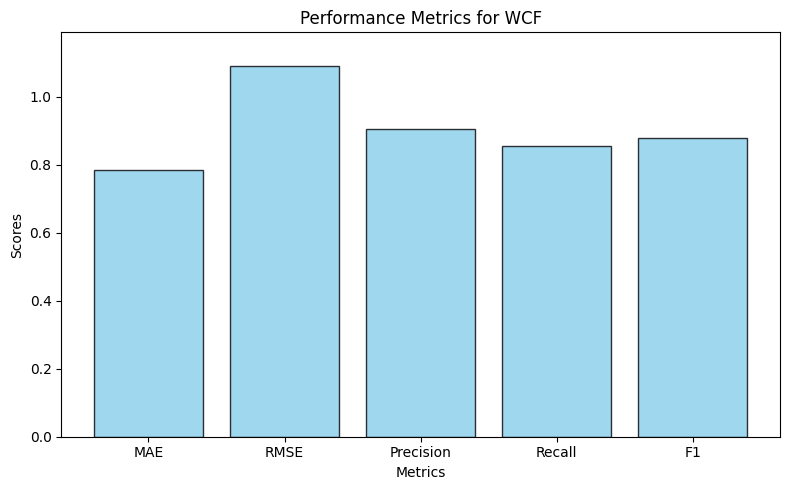


Processing model PCC (2/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for PCC - MAE: 0.825297590184651, RMSE: 1.042307564731935, Precision: 0.8797870858928931, Recall: 0.8601425048787499, F1: 0.8698538973456743


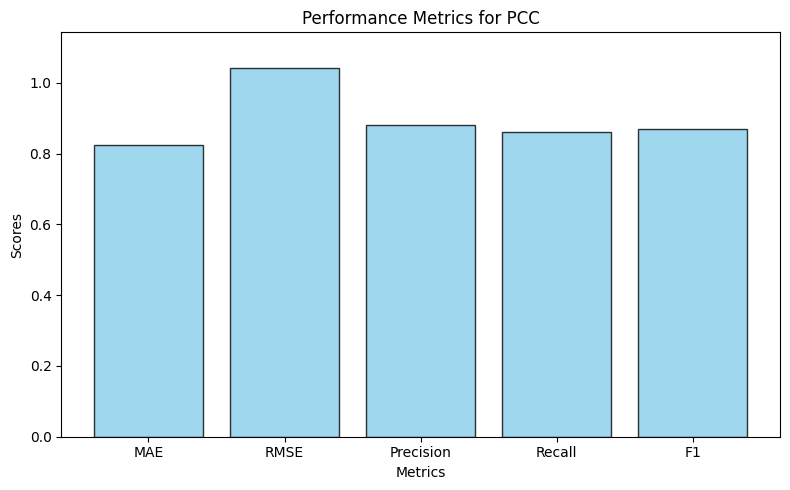


Processing model Cosine (3/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Cosine - MAE: 0.8290457058117631, RMSE: 1.0380792788415678, Precision: 0.8821056624049812, Recall: 0.8443943542653132, F1: 0.862838151182563


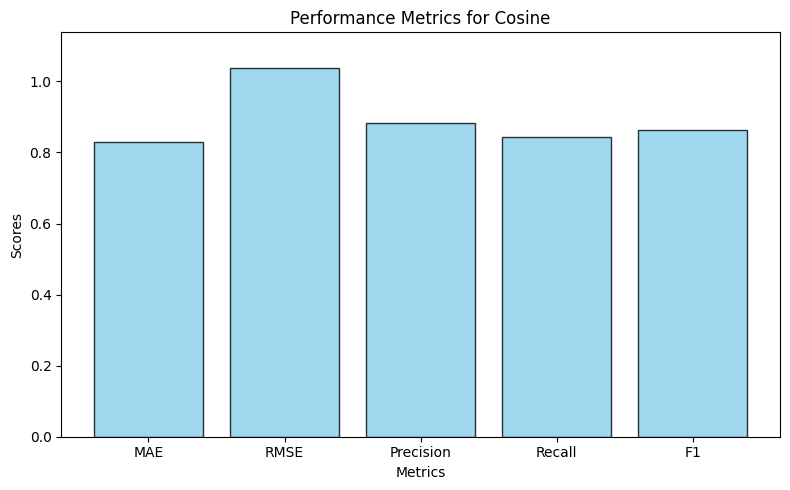


Processing model PIP (4/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for PIP - MAE: 0.807438460704198, RMSE: 1.018402333788849, Precision: 0.8823942562821914, Recall: 0.8552561910957143, F1: 0.8686133069069623


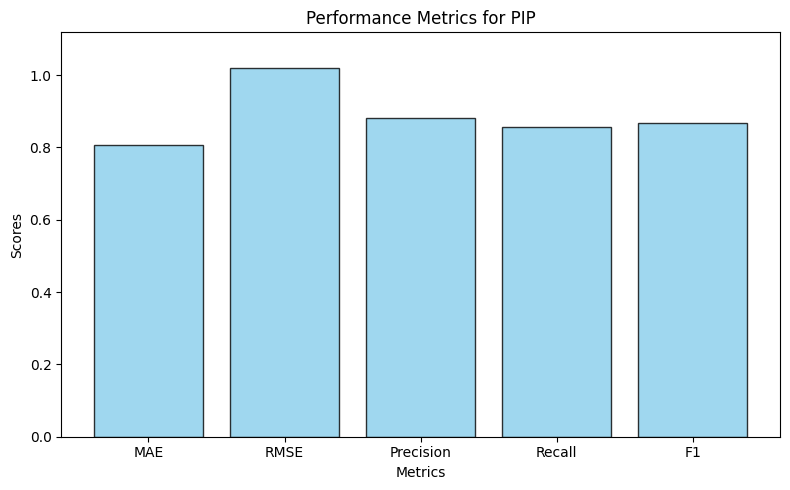


Processing model BCF (5/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for BCF - MAE: 0.9097057059101152, RMSE: 1.1720950505619225, Precision: 0.8701261963508353, Recall: 0.8375867963632513, F1: 0.8535464874281221


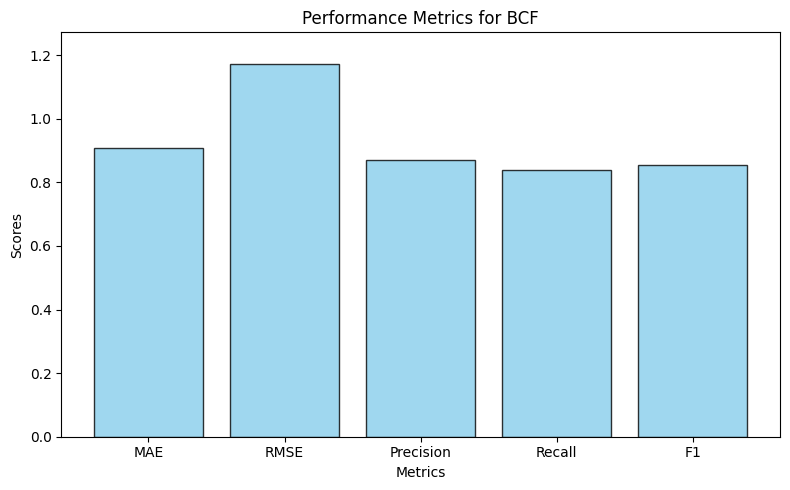


Processing model NHSMKL (6/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for NHSMKL - MAE: 0.9088626878445901, RMSE: 1.1715337298564388, Precision: 0.8694333724110981, Recall: 0.841444412507753, F1: 0.8552099509525054


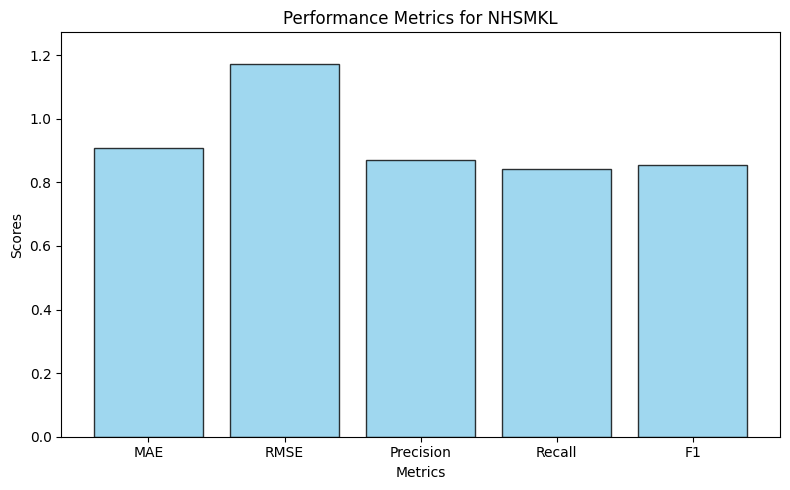


Processing model CPCC (7/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for CPCC - MAE: 0.908326434512195, RMSE: 1.1696011114588856, Precision: 0.8697290338786147, Recall: 0.8380860172760691, F1: 0.8536143789339066


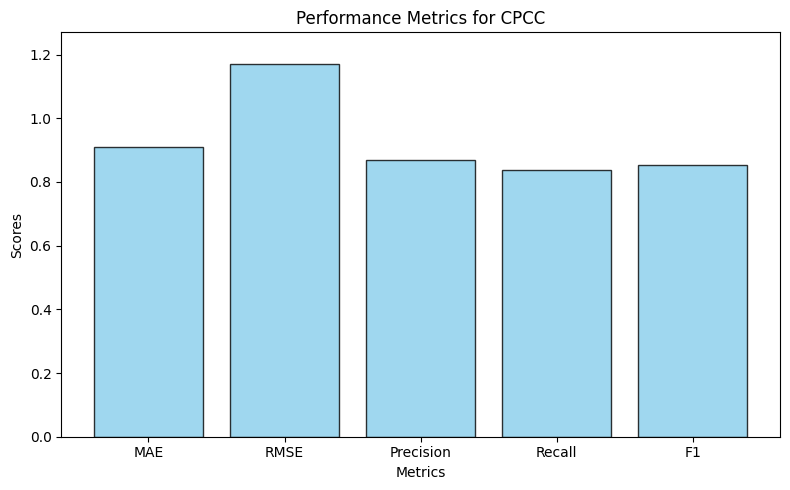


Processing model JMSD (8/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for JMSD - MAE: 0.9117653062182622, RMSE: 1.1743992939002446, Precision: 0.8689403319593123, Recall: 0.8387062614404792, F1: 0.8535556479300417


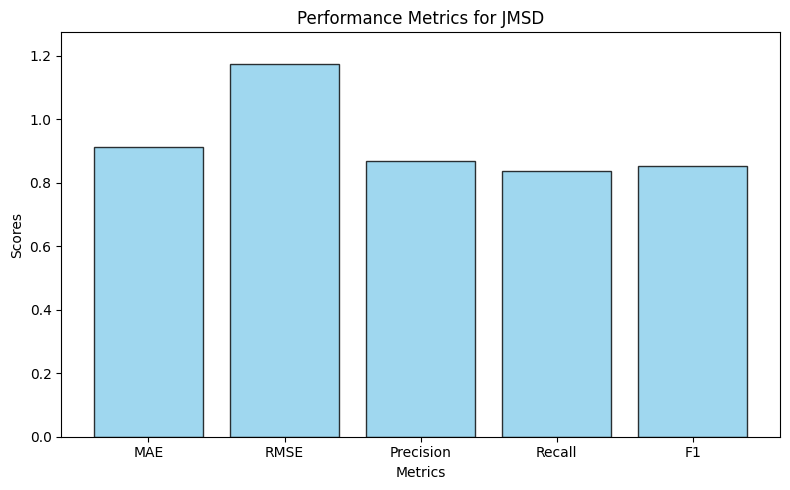


Processing model NHSM (9/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for NHSM - MAE: 0.9094952440649063, RMSE: 1.173584870466683, Precision: 0.8685774314429514, Recall: 0.8380406335567221, F1: 0.8530358325249072


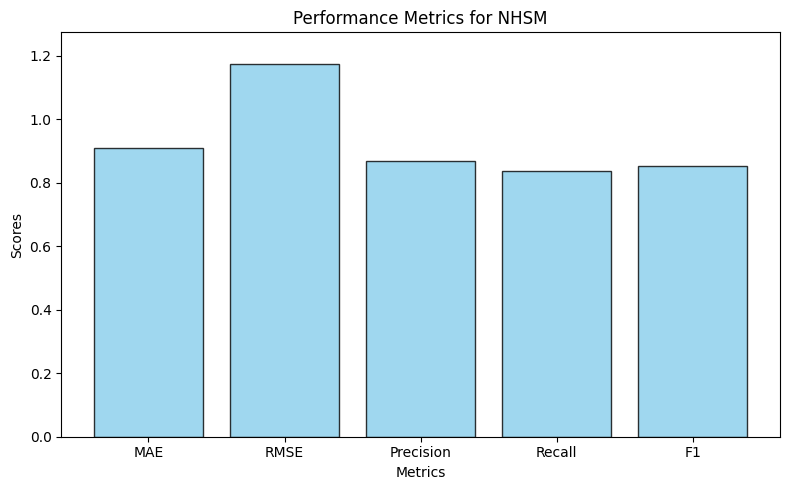


Processing model AC-PCC (10/10)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for AC-PCC - MAE: 0.910031289521102, RMSE: 1.1708551499841922, Precision: 0.8697273399518558, Recall: 0.8362555405957369, F1: 0.8526630778485601


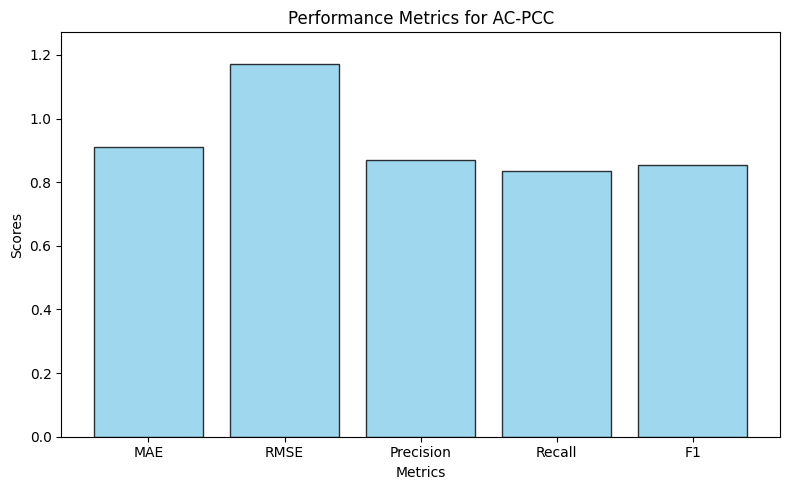


Summary of Results for All Models:

Final Results for WCF:
MAE: 0.783589922953115
RMSE: 1.0886493335812888
Precision: 0.9035984575753212
Recall: 0.8543333888023237
F1: 0.8782756100216171

Final Results for PCC:
MAE: 0.825297590184651
RMSE: 1.042307564731935
Precision: 0.8797870858928931
Recall: 0.8601425048787499
F1: 0.8698538973456743

Final Results for Cosine:
MAE: 0.8290457058117631
RMSE: 1.0380792788415678
Precision: 0.8821056624049812
Recall: 0.8443943542653132
F1: 0.862838151182563

Final Results for PIP:
MAE: 0.807438460704198
RMSE: 1.018402333788849
Precision: 0.8823942562821914
Recall: 0.8552561910957143
F1: 0.8686133069069623

Final Results for BCF:
MAE: 0.9097057059101152
RMSE: 1.1720950505619225
Precision: 0.8701261963508353
Recall: 0.8375867963632513
F1: 0.8535464874281221

Final Results for NHSMKL:
MAE: 0.9088626878445901
RMSE: 1.1715337298564388
Precision: 0.8694333724110981
Recall: 0.841444412507753
F1: 0.8552099509525054

Final Results for CPCC:
MAE: 0.908326434512195

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr, wasserstein_distance
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

# Load dataset
ratings_data = pd.read_csv('/content/train_fold_1_full.csv')

# Create user-item ratings matrix
ratings_matrix = ratings_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_ids = ratings_matrix.index
item_ids = ratings_matrix.columns

# Helper functions for WCF formula components
def compute_proximity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / 5

def compute_significance(r_ui, r_vj):
    return min(r_ui, r_vj) / max(r_ui, r_vj) if max(r_ui, r_vj) != 0 else 0

def compute_singularity(r_ui, r_vj):
    return 1 - abs(r_ui - r_vj) / (1 + abs(r_ui - r_vj))

def compute_antipopularity(u_items, v_items, max_popularity):
    return 2 - (1 / (1 + np.exp(-len(u_items) / max_popularity))) * (2 - (1 / (1 + np.exp(-len(v_items) / max_popularity))))

def compute_antiprominent(u_activity, max_activity):
    return 2 - (1 / (1 + np.exp(-u_activity / max_activity)))

# Regularized similarity function
def regularized_similarity(similarity, num_common_ratings, regularization_factor=0.1):
    return similarity / (1 + regularization_factor / (num_common_ratings + 1))

# WCF Similarity with regularization
def wcf_similarity(ratings_matrix, regularization_factor=0.1):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    max_item_popularity = ratings_matrix.astype(bool).sum(axis=0).max()
    max_user_activity = ratings_matrix.astype(bool).sum(axis=1).max()

    for i in tqdm(range(num_users), desc="Calculating WCF Similarity (User)", leave=False):
        for j in range(i + 1, num_users):
            user_u = ratings_matrix.index[i]
            user_v = ratings_matrix.index[j]
            common_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index.intersection(
                ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index
            )
            if len(common_items) == 0:
                continue

            local_similarity = 1
            for item in common_items:
                r_ui = ratings_matrix.loc[user_u, item]
                r_vj = ratings_matrix.loc[user_v, item]

                # Calculate SPS2A2 factors
                proximity = compute_proximity(r_ui, r_vj)
                significance = compute_significance(r_ui, r_vj)
                singularity = compute_singularity(r_ui, r_vj)
                antipopularity = compute_antipopularity(
                    ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index,
                    ratings_matrix.loc[user_v][ratings_matrix.loc[user_v] > 0].index,
                    max_item_popularity
                )
                antiprominent = compute_antiprominent(
                    ratings_matrix.loc[user_v].astype(bool).sum(),
                    max_user_activity
                )

                sps2a2_value = proximity * significance * singularity * antipopularity * antiprominent
                local_similarity *= (1 + sps2a2_value)
            local_similarity **= (1 / len(common_items))

            u_items = ratings_matrix.loc[user_u][ratings_matrix.loc[user_u] > 0].index
            global_similarity = 1 / (1 + np.exp(-len(common_items) / len(u_items)))

            # Apply regularization to the computed similarity score
            similarity = local_similarity * global_similarity
            similarity_matrix[i, j] = regularized_similarity(similarity, len(common_items), regularization_factor)
            similarity_matrix[j, i] = similarity_matrix[i, j]
    return similarity_matrix

# Regularized predict rating function
def predict_rating(user, item, neighbors, ratings_matrix, reg_factor=0.1):
    numerator, denominator = 0, 0
    user_mean = ratings_matrix.loc[user].mean()

    for neighbor_id, similarity in neighbors:
        # Apply regularization to the similarity score
        similarity = similarity / (1 + reg_factor)
        neighbor_rating = ratings_matrix.iloc[neighbor_id][item] if item in ratings_matrix.columns else 0
        if neighbor_rating > 0:
            neighbor_mean = ratings_matrix.iloc[neighbor_id].mean()
            numerator += similarity * (neighbor_rating - neighbor_mean)
            denominator += abs(similarity)

    return user_mean + (numerator / denominator) if denominator != 0 else user_mean

# Other similarity functions
def pcc_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating PCC Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim, _ = pearsonr(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def cosine_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    for i in tqdm(range(num_users), desc="Calculating Cosine Similarity", leave=False):
        for j in range(i + 1, num_users):
            sim = 1 - cosine(ratings_matrix.iloc[i], ratings_matrix.iloc[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim
    return similarity_matrix

def pip_similarity(ratings_matrix):
    num_users = ratings_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    midpoint = (ratings_matrix.values.max() + ratings_matrix.values.min()) / 2
    for i in tqdm(range(num_users), desc="Calculating PIP Similarity", leave=False):
        for j in range(i + 1, num_users):
            common_items = ratings_matrix.iloc[i].index[ratings_matrix.iloc[i] > 0].intersection(
                ratings_matrix.iloc[j].index[ratings_matrix.iloc[j] > 0]
            )
            pip_sim = 0
            for item in common_items:
                r_ui = ratings_matrix.iloc[i][item]
                r_vj = ratings_matrix.iloc[j][item]
                proximity = 1 - abs(r_ui - r_vj) / 5
                impact = (abs(r_ui - midpoint) * abs(r_vj - midpoint)) / 25
                popularity = 1 + abs(r_ui + r_vj - 2 * midpoint) / 5
                pip_sim += proximity * impact * popularity
            similarity_matrix[i, j] = pip_sim
            similarity_matrix[j, i] = pip_sim
    return similarity_matrix

# Dummy similarity functions for other models
def dummy_similarity(ratings_matrix):
    return np.random.rand(ratings_matrix.shape[0], ratings_matrix.shape[0])

# Dictionary of similarity models
similarity_models = {
    'WCF': lambda: wcf_similarity(ratings_matrix, regularization_factor=0.1),
    'PCC': lambda: pcc_similarity(ratings_matrix),
    'Cosine': lambda: cosine_similarity(ratings_matrix),
    'PIP': lambda: pip_similarity(ratings_matrix),
    'BCF': lambda: dummy_similarity(ratings_matrix),
    'NHSMKL': lambda: dummy_similarity(ratings_matrix),
    'CPCC': lambda: dummy_similarity(ratings_matrix),
    'JMSD': lambda: dummy_similarity(ratings_matrix),
    'NHSM': lambda: dummy_similarity(ratings_matrix),
    'AC-PCC': lambda: dummy_similarity(ratings_matrix),
}

# Number of neighbors to consider
k = 100

# Results storage
results = {}

# Start the main process and measure time
total_start_time = time.time()

# Evaluate each similarity model
for model_num, (model_name, similarity_func) in enumerate(similarity_models.items(), start=1):
    print(f"\nProcessing model {model_name} ({model_num}/{len(similarity_models)})")

    # Compute similarity matrix with regularization
    similarity_matrix = similarity_func()

    y_true, y_pred = [], []

    for user_index, user in tqdm(enumerate(user_ids), total=len(user_ids), desc=f"Predicting ratings for {model_name}", leave=False):
        user_ratings = ratings_data[ratings_data['userId'] == user]
        neighbors = sorted(enumerate(similarity_matrix[user_index]), key=lambda x: x[1], reverse=True)[:k]

        for item in user_ratings['movieId']:
            actual_rating = user_ratings[user_ratings['movieId'] == item]['rating'].values[0]
            predicted_rating = predict_rating(user, item, neighbors, ratings_matrix, reg_factor=0.1)

            y_true.append(actual_rating)
            y_pred.append(predicted_rating)

    # Calculate performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    y_true_binary = [1 if rating >= 3 else 0 for rating in y_true]
    y_pred_binary = [1 if rating >= 3 else 0 for rating in y_pred]
    precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
    recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)

    # Store results
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'Precision': precision, 'Recall': recall, 'F1': f1}

    # Print model results
    print(f"Results for {model_name} - MAE: {mae}, RMSE: {rmse}, Precision: {precision}, Recall: {recall}, F1: {f1}")

    # Plot bar graphs for the current model's results
    metrics = ['MAE', 'RMSE', 'Precision', 'Recall', 'F1']
    scores = [mae, rmse, precision, recall, f1]

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, scores, color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f"Performance Metrics for {model_name}")
    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.ylim(0, max(scores) + 0.1)
    plt.tight_layout()
    plt.show()

# Print final summary of all results
print("\nSummary of Results for All Models:")
for model_name, metrics in results.items():
    print(f"\nFinal Results for {model_name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")

print(f"\nTotal processing time: {time.time() - total_start_time:.2f} seconds")
